# 1. Importing Data & Libraries

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)# Adjust the config of the plots we will create


In [2]:
# Create DataFrame

df = pd.read_csv('/Users/kacpermajek/Desktop/DA Projects/raw_data/ks_2018.csv')

# 2. Cleaning Data

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# Remove unnecessary columns
df = df.drop(['pledged', 'usd pledged', 'goal'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   launched          378661 non-null  object 
 7   state             378661 non-null  object 
 8   backers           378661 non-null  int64  
 9   country           378661 non-null  object 
 10  usd_pledged_real  378661 non-null  float64
 11  usd_goal_real     378661 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 34.7+ MB


In [5]:
# Convert to lowercase for specified columns
df['category'] = df['category'].str.lower()
df['main_category'] = df['main_category'].str.lower()
df['state'] = df['state'].str.lower()

# Convert to uppercase for specified columns
df['currency'] = df['currency'].str.upper()
df['country'] = df['country'].str.upper()

df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,poetry,publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,narrative film,film & video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,narrative film,film & video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,music,music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,film & video,film & video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [6]:
# Convert to datetime
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])


# Convert Categorical columns to 'category' Data Type
categorical_cols = ['category', 'main_category', 'currency', 'state', 'country']
df[categorical_cols] = df[categorical_cols].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  category      
 3   main_category     378661 non-null  category      
 4   currency          378661 non-null  category      
 5   deadline          378661 non-null  datetime64[ns]
 6   launched          378661 non-null  datetime64[ns]
 7   state             378661 non-null  category      
 8   backers           378661 non-null  int64         
 9   country           378661 non-null  category      
 10  usd_pledged_real  378661 non-null  float64       
 11  usd_goal_real     378661 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 22.4+ MB


In [7]:
# Check for missing data
df.isnull().sum()

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [8]:
# There are 4 missing values. Remove the rows with missing values.
df = df.dropna()
df.isnull().sum()


ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [9]:
# Check for duplicates
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

# No duplicates

Number of duplicate rows: 0


In [10]:
# Create a column 'duration' to follow the duration of campaign
df['duration'] = (df['deadline'] - df['launched']).dt.days + 1

In [11]:
# Check for rows with duration > 60, because 60 is MAX campaign duration on kickstarter.

# Calculate the amount of rows with duration > 60
count_duration_gt_60 = len(df[df['duration'] > 60])

print(f"The number rows with duration greater than 60 is: {count_duration_gt_60}")

The number rows with duration greater than 60 is: 5478


In [12]:
# Remove rows with duration > 60, 
df = df[df['duration'] <= 60]

# Recalculate the amount of rows with duration > 60
count_duration_gt_60 = len(df[df['duration'] > 60])

print(f"The number rows with duration greater than 60 is: {count_duration_gt_60}")

The number rows with duration greater than 60 is: 0


In [13]:
# Import calendar for month name sorting
import calendar

# Extract the launch year and month from the 'launched' datetime column
df['launch_year'] = df['launched'].dt.year
df['launch_month'] = df['launched'].dt.strftime('%b')  # Format months as Jan, Feb, Mar, etc.

# Get the unique years and months for which we have data
unique_years = sorted(df['launch_year'].unique())  # Sort unique years

# Sort unique months using a custom order
custom_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
unique_months = sorted(df['launch_month'].unique(), key=custom_month_order.index)

# Display the unique years and months
print("Unique Years:", unique_years)
print("Unique Months:", unique_months)

Unique Years: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Unique Months: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [14]:
# Specify the current positions of 'launch_year', 'launch_month', and 'duration' columns

current_year_position = df.columns.get_loc('launch_year')
current_month_position = df.columns.get_loc('launch_month')
current_duration_position = df.columns.get_loc('duration')

# Specify the desired positions (7th, 8th and 9th columns)
desired_year_position = 7
desired_month_position = 8
desired_duration_position = 9

df.insert(desired_year_position, 'launch_year', df.pop('launch_year'))
df.insert(desired_month_position, 'launch_month', df.pop('launch_month'))
df.insert(desired_duration_position, 'duration', df.pop('duration'))

# Change the name of the 'launched' column to 'launch_date'
df.rename(columns={'launched': 'launch_date'}, inplace=True)

# Let's see the results
df.head()

,ID,name,category,main_category,currency,deadline,launch_date,launch_year,launch_month,duration,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,poetry,publishing,GBP,2015-10-09,2015-08-11 12:12:28,2015,Aug,59,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,narrative film,film & video,USD,2017-11-01,2017-09-02 04:43:57,2017,Sep,60,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,narrative film,film & video,USD,2013-02-26,2013-01-12 00:20:50,2013,Jan,45,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,music,music,USD,2012-04-16,2012-03-17 03:24:11,2012,Mar,30,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,film & video,film & video,USD,2015-08-29,2015-07-04 08:35:03,2015,Jul,56,canceled,14,US,1283.0,19500.00


In [15]:
# Convert launch_month to DataType 'category'
df['launch_month'] = df['launch_month'].astype('category')

In [16]:
# Check if there are values that skew data in categorical columns

# List of categorical column names
categorical_columns = ['category', 'main_category', 'currency', 'state', 'country', 'launch_month']

# Set display options to show all rows without truncation
pd.set_option('display.max_rows', None)

# Iterate through each categorical column and print value counts
for column in categorical_columns:
    value_counts = df[column].value_counts()
    
##### To see all values in categorical columns run the code below. Now I don't do that as it takes space.

   ### print(f"Value counts in '{column}':")
   ### print(value_counts)
   ### print()

# Reset display options to default (if needed)
pd.reset_option('display.max_rows')

In [17]:
# There are values 'undefined', 'live' in column 'state' 
# There is value 'N,0"' in column 'country'

# Count the number of projects in the state "undefined"
undefined_count = len(df[df['state'] == 'undefined'])

# Count the number of projects in the state "live"
live_count = len(df[df['state'] == 'live'])

# Count the number of projects with the country code "N,0""
country_count = len(df[df['country'] == 'N,0"'])

print(f"Amount of state undefined: {undefined_count}")
print(f"Amount of state live: {live_count}")
print(f"Amount of countries N,0\": {country_count}")

Amount of state undefined: 3559
Amount of state live: 2797
Amount of countries N,0": 3794


In [18]:
# Remove rows with 'state' equal to 'undefined' or 'live'
df = df[(df['state'] != 'undefined') & (df['state'] != 'live')]

# Remove rows with 'country' equal to 'N,0"'
df = df[df['country'] != 'N,0"']

# Replace 'live' and 'undefined' in the 'state' column with 'None'
df['state'].replace({'live': None, 'undefined': None}, inplace=True)

# Replace 'N,0"' in the 'country' column with 'None'
df['country'].replace({'N,0"': None}, inplace=True)

In [19]:
# Recalculate count of 'undefined'
undefined_count = len(df[df['state'] == 'undefined'])

# Recalculate count of 'live'
live_count = len(df[df['state'] == 'live'])

# Recalculate count of 'N,0\"'
country_count = len(df[df['country'] == 'N,0"'])

print(f"Amount of state undefined: {undefined_count}")
print(f"Amount of state live: {live_count}")
print(f"Amount of countries N,0\": {country_count}")

Amount of state undefined: 0
Amount of state live: 0
Amount of countries N,0": 0


In [20]:
# I noticed there are only 2 projects with launch_year == 2018. Better remove them, so they don't skew data.

# Count the number of projects with 'launch_year' equal to 2018
launch_year_2018_count = len(df[df['launch_year'] == 2018])
print(f"Amount of projects in 2018: {launch_year_2018_count}")

Amount of projects in 2018: 2


In [21]:
df = df[df['launch_year'] != 2018]

launch_year_2018_count = len(df[df['launch_year'] == 2018])
print(f"Amount of projects in 2018: {launch_year_2018_count}")

Amount of projects in 2018: 0


# 3. Exploratory Data Analysis

### DataFrame preview

In [22]:
df.head()

,ID,name,category,main_category,currency,deadline,launch_date,launch_year,launch_month,duration,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,poetry,publishing,GBP,2015-10-09,2015-08-11 12:12:28,2015,Aug,59,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,narrative film,film & video,USD,2017-11-01,2017-09-02 04:43:57,2017,Sep,60,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,narrative film,film & video,USD,2013-02-26,2013-01-12 00:20:50,2013,Jan,45,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,music,music,USD,2012-04-16,2012-03-17 03:24:11,2012,Mar,30,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,film & video,film & video,USD,2015-08-29,2015-07-04 08:35:03,2015,Jul,56,canceled,14,US,1283.0,19500.00


### 3.1 Summary statistics
Let's look into some numeric columns.

In [23]:
# Change Pandas' default display for floating point numbers to non-scientific format
pd.set_option('display.float_format', '{:.2f}'.format)

# List of columns to include in summary statistics
included_columns = ['duration', 'backers', 'usd_pledged_real', 'usd_goal_real']

# Create a DataFrame subset with only the included columns
subset_df = df[included_columns]

# Calculate and display summary statistics
summary_stats = subset_df.describe()
summary_stats

,duration,backers,usd_pledged_real,usd_goal_real
count,366587.00,366587.00,366587.00,366587.00
mean,33.51,108.02,9237.38,45971.85
std,11.55,921.18,92292.97,1158065.74
min,1.00,0.00,0.00,0.01
25%,30.00,2.00,31.00,2000.00
50%,30.00,12.00,630.00,5500.00
75%,36.00,57.00,4086.00,16000.00
max,60.00,219382.00,20338986.27,166361390.71


Observation:

- std deviation & max are very high for ('backers', 'usd_pledged_real', 'usd_goal_real')

Conclusions:
- High std deviation indicates large variability in (backers, pledged, goal) for projects.
- High max indicates there are some exceptionally big successful projects.

### 3.2 Overview of Dataset

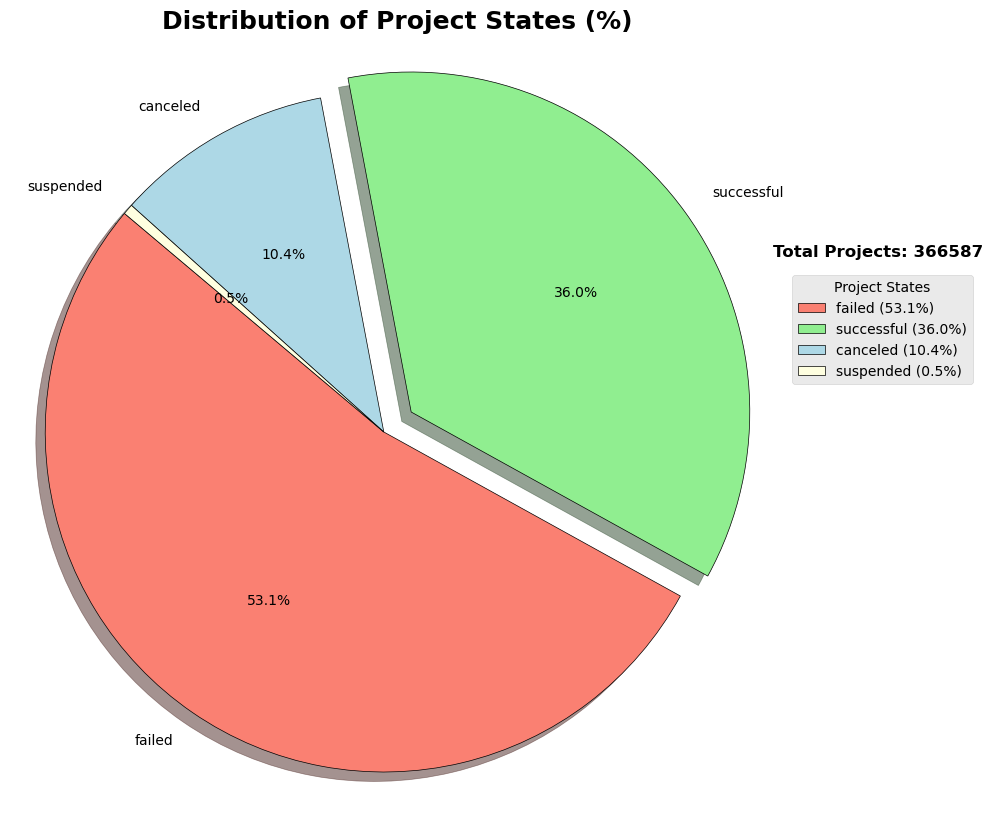

In [24]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution of project states
state_distribution = df['state'].value_counts(normalize=True) * 100

# Define custom colors for each state
custom_colors = {
    'failed': 'salmon',
    'successful': 'lightgreen',
    'canceled': 'lightblue',
    'suspended': 'lightyellow'
}

# Filter the colors to match the index of 'state_distribution'
filtered_colors = [custom_colors.get(state, 'grey') for state in state_distribution.index]

# Define explode values to separate 'successful' slice
explode_values = [0.1 if state == 'successful' else 0 for state in state_distribution.index]

# Create a pie chart with a legend
plt.figure(figsize=(10, 10))
plt.pie(state_distribution, labels=state_distribution.index, autopct='%1.1f%%', 
        colors=filtered_colors, wedgeprops=dict(edgecolor='black'), explode=explode_values,
        shadow=True, startangle=140)

# Create a legend
legend_labels = [f"{state} ({percent:.1f}%)" for state, percent in zip(state_distribution.index, state_distribution)]
plt.legend(legend_labels, title='Project States', loc='best', bbox_to_anchor=(1, 0.7))

# Add the total number of projects as text annotation
total_projects = len(df)
plt.text(1.12, 0.72, f'Total Projects: {total_projects}', 
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=12, 
         fontweight='bold')

plt.title('Distribution of Project States (%)',fontsize=18, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

### 3.3 Close look at Main Categories

We can see that majority of projects fail (Failed: 53% Successful: 36%). Good to know.

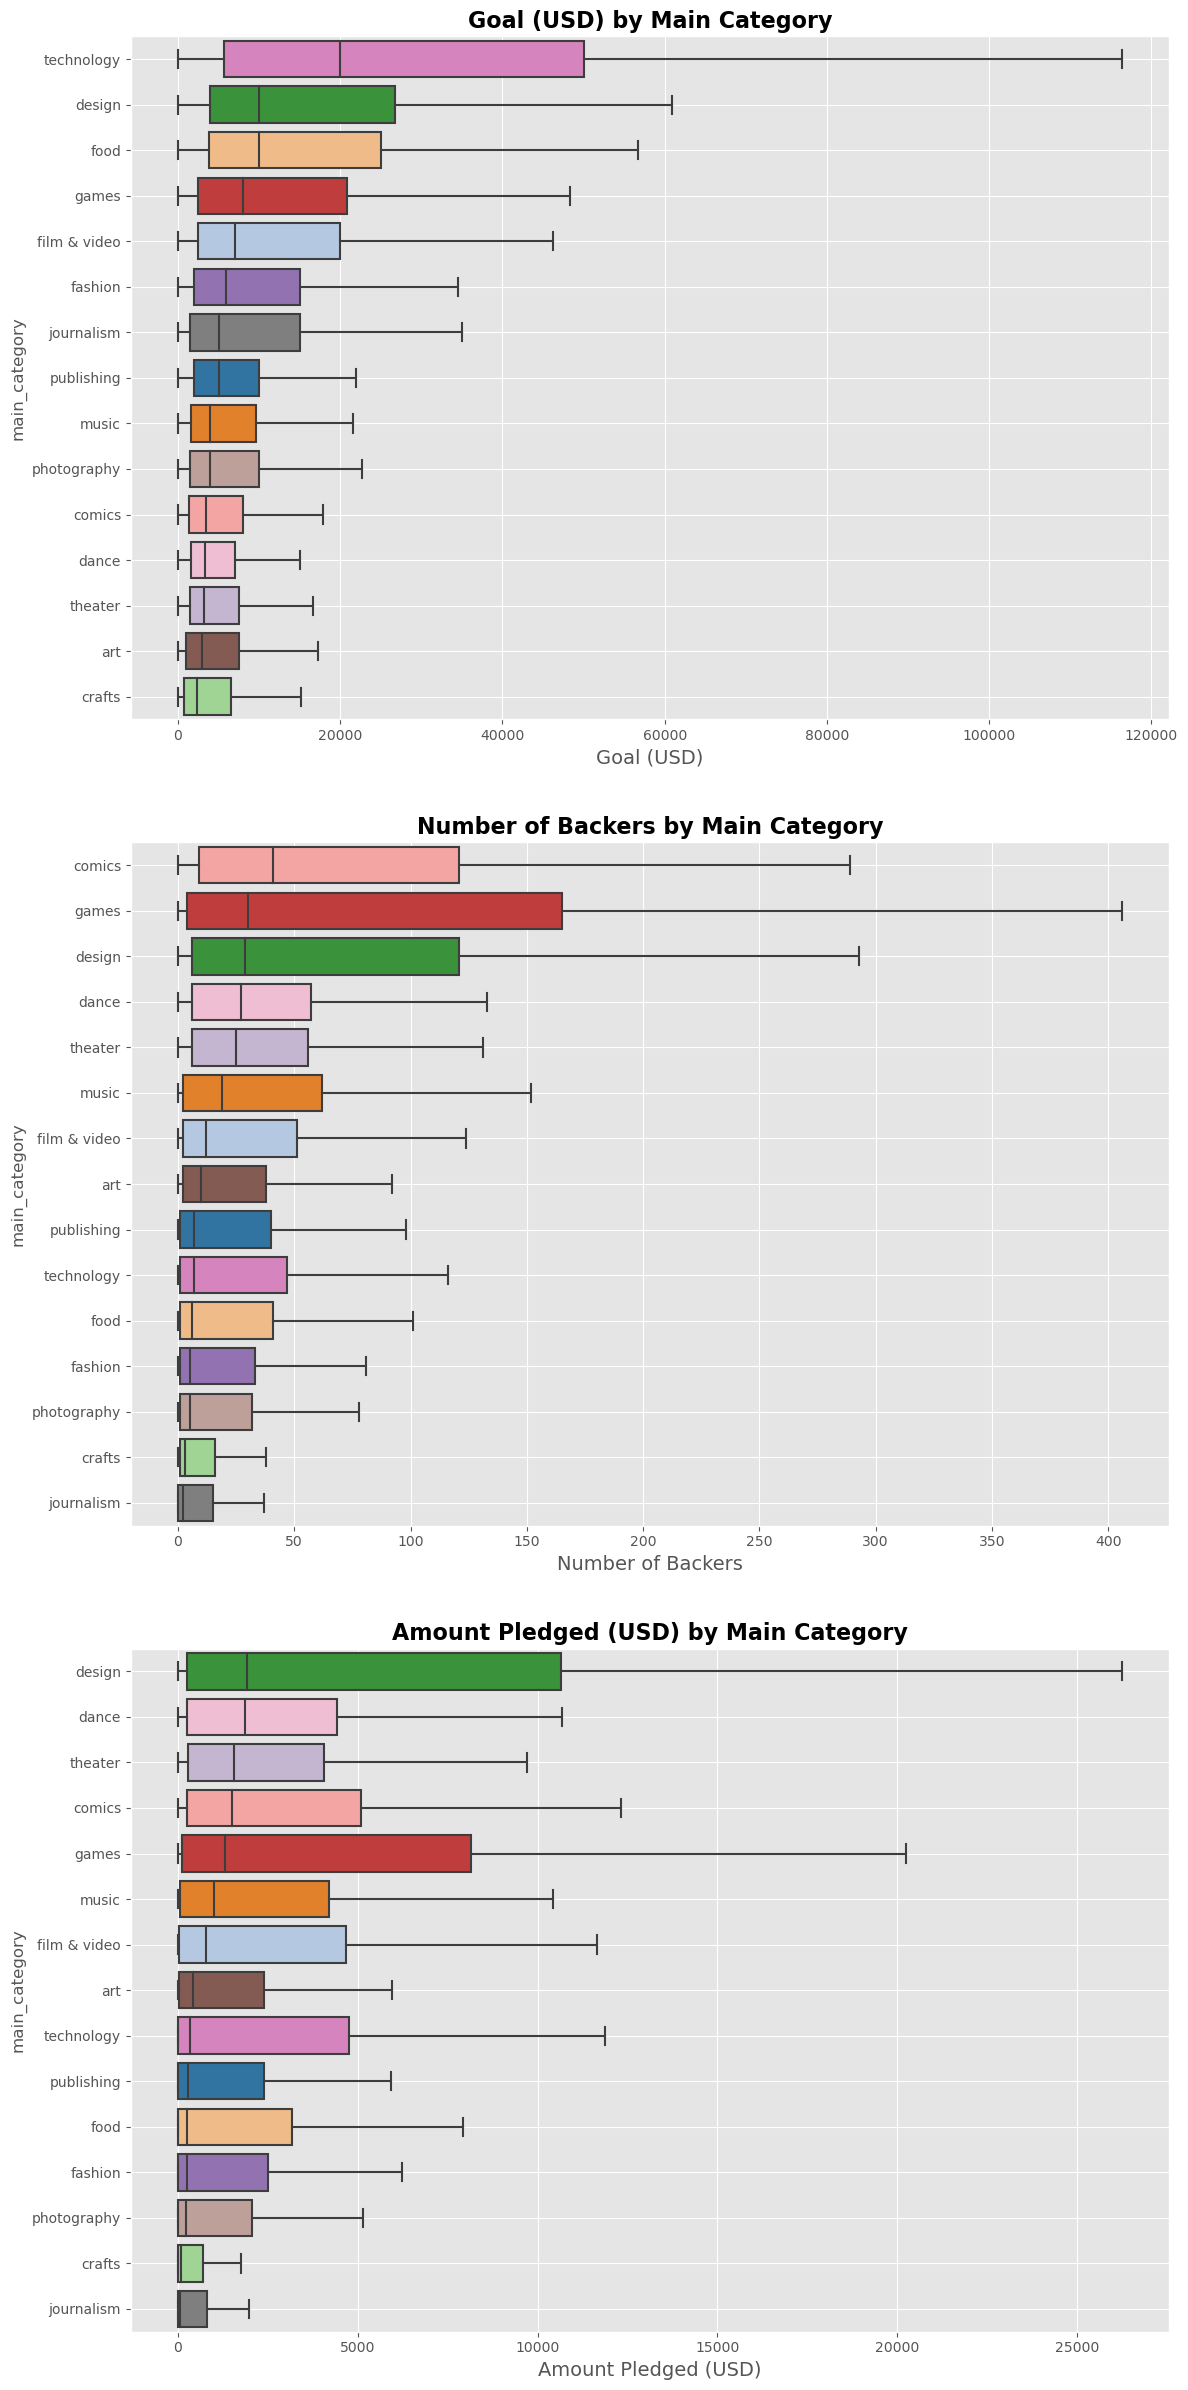

In [25]:
import seaborn as sns

# Your original color map and dictionary
color_map = plt.cm.tab20  # Updated line
color_dict_main = {category: color_map(i) for i, category in enumerate(df['main_category'].unique())}

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 24))

# Plot 1: Median Project Goal by Main Category
median_goal_per_main_category = df.groupby('main_category')['usd_goal_real'].median().sort_values(ascending=False)
sns.boxplot(x='usd_goal_real', y='main_category', data=df, order=median_goal_per_main_category.index, palette=color_dict_main, showfliers=False, ax=axs[0])
axs[0].set_xlabel('Goal (USD)', fontsize=14)
axs[0].set_title('Goal (USD) by Main Category', fontsize=16, fontweight='bold')
axs[0].grid(True)

# Plot 2: Median Number of Backers by Main Category
median_backers_per_main_category = df.groupby('main_category')['backers'].median().sort_values(ascending=False)
sns.boxplot(x='backers', y='main_category', data=df, order=median_backers_per_main_category.index, palette=color_dict_main, showfliers=False, ax=axs[1])
axs[1].set_xlabel('Number of Backers', fontsize=14)
axs[1].set_title('Number of Backers by Main Category', fontsize=16, fontweight='bold')
axs[1].grid(True)

# Plot 3: Median Amount Pledged by Main Category
median_pledged_per_main_category = df.groupby('main_category')['usd_pledged_real'].median().sort_values(ascending=False)
sns.boxplot(x='usd_pledged_real', y='main_category', data=df, order=median_pledged_per_main_category.index, palette=color_dict_main, showfliers=False, ax=axs[2])
axs[2].set_xlabel('Amount Pledged (USD)', fontsize=14)
axs[2].set_title('Amount Pledged (USD) by Main Category', fontsize=16, fontweight='bold')
axs[2].grid(True)

# Show the plots
plt.tight_layout()

# Adjust spacing between the two subplots and the legend
plt.subplots_adjust(hspace = 0.18, wspace = 0.3)

plt.show()

Conclusions:

Goal (USD) by Main Category:  
- 'Technology' projects have by far highest Goal (USD)

Number of Backers by Main Category:
- ('Comics', 'Games', 'Design') Projects have by Far most Backers.
- 'Games' has high Q3 and upper whisker. Than means some Top Games Projects attract extraordinary amount of backers.

Amount Pledged (USD) by Main Category:
- 'Design' is big favourite
- 'Games' again have high Q3 and upper whisker 

More observations:
- We can see that everywhere the median line is in the lower part of the box. That tells us that most projects are rather moderate, but there are some projects that go really big.


### 3.4 Investigating Main Categories and Sub-Categories

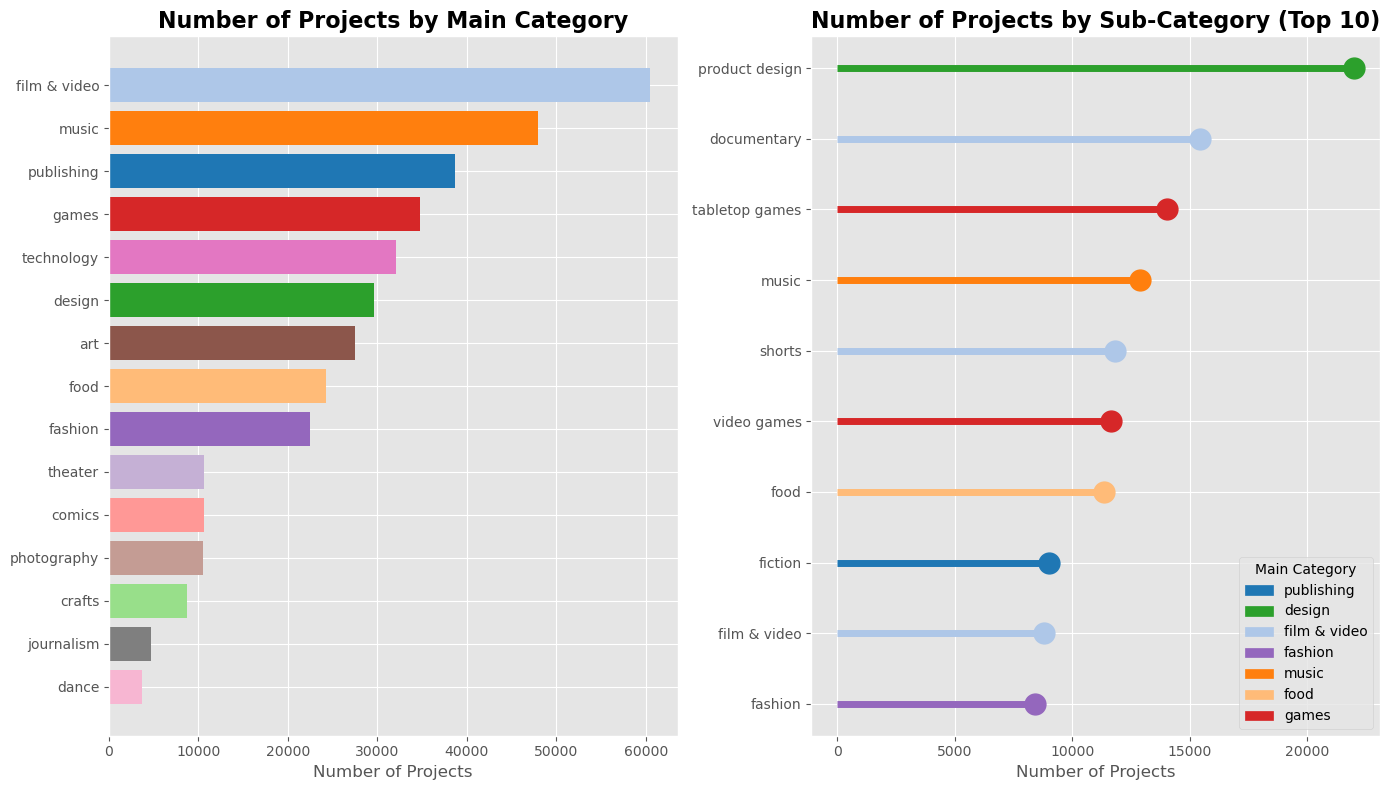

In [26]:
# Calculate the top 10 categories based on the number of projects launched
top_10_categories = df['category'].value_counts().sort_values(ascending=False).head(10)

# Create a mapping from 'category' to 'main_category' for top 10 categories
category_to_main = df[df['category'].isin(top_10_categories.index)].groupby('category')['main_category'].first().dropna()

# Group the data by 'main_category' and count the number of projects in each category
category_counts_main = df['main_category'].value_counts().sort_values(ascending=False)

# Create a set of main_categories that are actually present in the 'category' chart
present_main_categories = set(category_to_main.values)

# Filter the handles and labels for the legend
filtered_handles = [plt.Rectangle((0,0),1,1, color=color_dict_main[category]) for category in present_main_categories]

# Create a new figure and axes for the modified charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Bar chart for the number of projects in each main category
ax1.barh(category_counts_main.index, category_counts_main.values, color=[color_dict_main[cat] for cat in category_counts_main.index])
ax1.set_xlabel('Number of Projects')
ax1.set_title('Number of Projects by Main Category',fontsize=16, fontweight='bold')
ax1.invert_yaxis()

# Lollipop chart for the top 10 categories by number of projects
for idx, value in enumerate(top_10_categories):
    category_name = top_10_categories.index[idx]
    color = color_dict_main[category_to_main[category_name]]
    ax2.hlines(y=category_name, xmin=0, xmax=value, color=color, linewidth=5)
    ax2.plot(value, category_name, 'o', markersize=15, color=color)

ax2.set_xlabel('Number of Projects')
ax2.set_title('Number of Projects by Sub-Category (Top 10)',fontsize=16, fontweight='bold')
ax2.invert_yaxis()

# Adding the legend for the 'category' chart
ax2.legend(filtered_handles, present_main_categories, title="Main Category", loc="lower right")

# Adjust spacing between the two subplots
plt.tight_layout()

# Display the combined chart
plt.show()

Conclusions:
    
Main Categories:
- There's a big difference in popularity (e.g. 'Film & Video' is 16x more popular than 'Dance').

Sub-Categories:
- 'Product Design' is the most popular Sub-Category.

### 3.5 Success Rate (%) by Main Category and Sub-Category

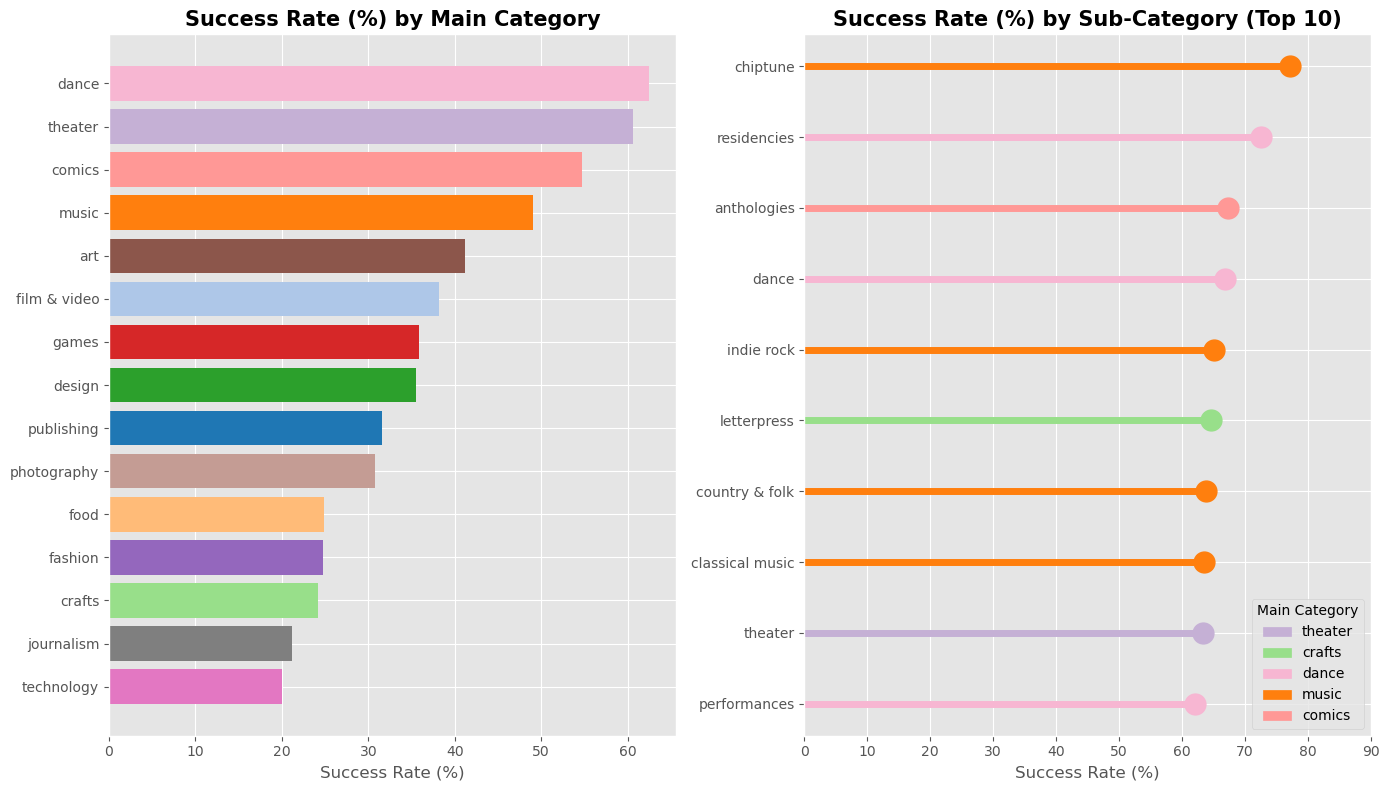

In [27]:
# Calculate the success rate for each main category
main_category_success_rate = (df[df['state'] == 'successful']['main_category'].value_counts() / df['main_category'].value_counts()) * 100
main_category_success_rate = main_category_success_rate.sort_values(ascending=False)

# Calculate the success rate for each category
category_success_rate = (df[df['state'] == 'successful']['category'].value_counts() / df['category'].value_counts()) * 100
top_10_category_success_rate = category_success_rate.sort_values(ascending=False).head(10)

# Create a mapping from 'category' to 'main_category' for top 10 categories
category_to_main = df[df['category'].isin(top_10_category_success_rate.index)].groupby('category')['main_category'].first().dropna()

# Create a set of main_categories that are actually present in the 'category' chart
present_main_categories = set(category_to_main.values)

# Filter the handles and labels for the legend
filtered_handles = [plt.Rectangle((0,0),1,1, color=color_dict_main[category]) for category in present_main_categories]

# Create a new figure and axes for the modified charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Bar chart for main categories
ax1.barh(main_category_success_rate.index, main_category_success_rate.values, color=[color_dict_main[cat] for cat in main_category_success_rate.index])
ax1.set_xlabel('Success Rate (%)')
ax1.set_title('Success Rate (%) by Main Category',fontsize=15, fontweight='bold')
ax1.invert_yaxis()

# Lollipop chart for top 10 categories
for idx, value in enumerate(top_10_category_success_rate):
    category_name = top_10_category_success_rate.index[idx]
    color = color_dict_main[category_to_main[category_name]]
    ax2.hlines(y=category_name, xmin=0, xmax=value, color=color, linewidth=5)
    ax2.plot(value, category_name, 'o',markersize=15, color=color)

ax2.set_xlabel('Success Rate (%)')
ax2.set_title('Success Rate (%) by Sub-Category (Top 10)',fontsize=15, fontweight='bold')
ax2.invert_yaxis()
ax2.set_xlim(0, 90)

# Adding the legend for the 'category' chart
ax2.legend(filtered_handles, present_main_categories, title="Main Category", loc="lower right")

# Adjust spacing between the two subplots
plt.tight_layout()

# Display the combined chart
plt.show()

Conclusions:
    
Main Category:
- Huge differences in Success Rate (e.g. 'Dance' is 3x higher than 'Technology')
- Top 3 most successful Main Categories are very low in popularity (concluded from chart 3.4)

Sub-Category:
- There are 4 Sub-Categories belonging to Main Category 'Music'

### 3.6 Closer look at Sub-Categories Success Rate (%)

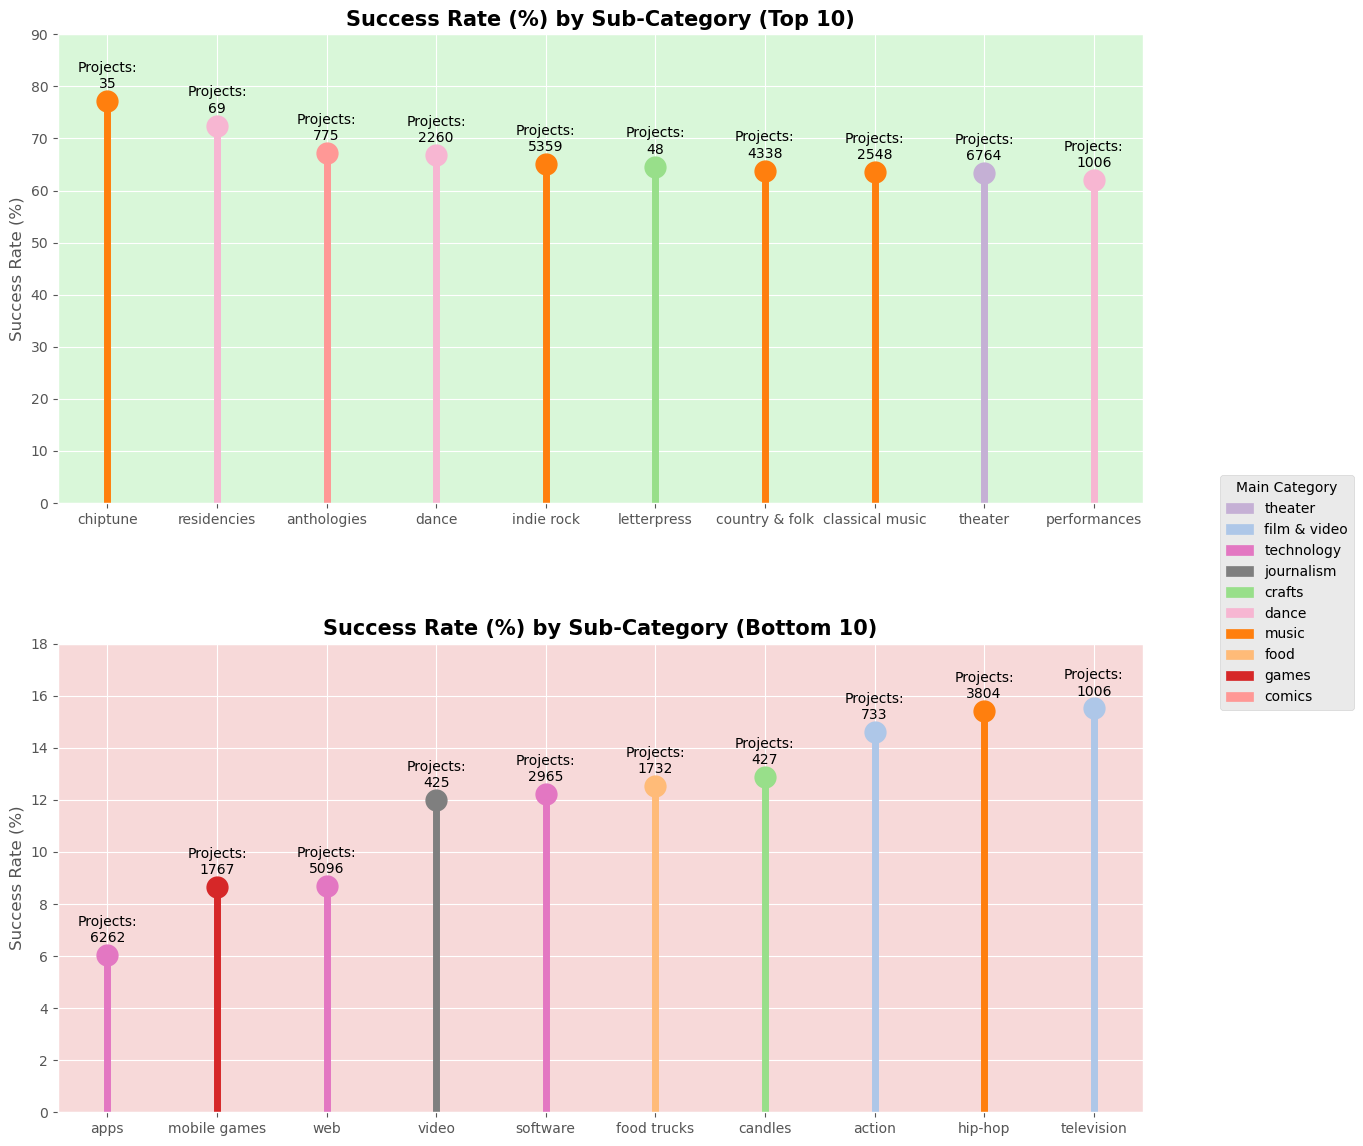

In [28]:
# Sample data (replace this with your actual DataFrame)
# df = ...

# Calculate the success rate for each category
category_percentage = (df[df['state'] == 'successful']['category'].value_counts() / df['category'].value_counts()) * 100
category_counts = df['category'].value_counts()

# Sort the categories by success rate
sorted_categories = category_percentage.sort_values()

# Select the top 10 and bottom 10 categories
top_10_categories = sorted_categories.nlargest(10)
bottom_10_categories = sorted_categories.nsmallest(10)

# Create a mapping from 'category' to 'main_category'
category_to_main = df[df['category'].isin(top_10_categories.index.tolist() + bottom_10_categories.index.tolist())].groupby('category')['main_category'].first().dropna()

# Create a color map for main categories
color_map = plt.cm.tab20
color_dict_main = {category: color_map(i) for i, category in enumerate(df['main_category'].unique())}

# Create a 2x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

# Plot the top 10 categories as vertical Lollipop with colors and project counts
for idx, value in enumerate(top_10_categories):
    category_name = top_10_categories.index[idx]
    color = color_dict_main[category_to_main[category_name]]
    project_count = category_counts.loc[category_name]
    axes[0].vlines(x=category_name, ymin=0, ymax=value, color=color, linewidth=5)
    axes[0].plot(category_name, value, 'o', markersize=15, color=color)
    axes[0].text(category_name, value + 2.5, f'Projects:\n{project_count}', ha='center')  # Positioned below the marker

axes[0].set_title('Success Rate (%) by Sub-Category (Top 10)', fontsize=15, fontweight='bold')
axes[0].set_facecolor((0, 0.8, 0, 0.15)) 
axes[0].set_ylabel('Success Rate (%)')
axes[0].set_ylim(0, 90)  

# Plot the bottom 10 categories as vertical Lollipop with colors and project counts
for idx, value in enumerate(bottom_10_categories):
    category_name = bottom_10_categories.index[idx]
    color = color_dict_main[category_to_main[category_name]]
    project_count = category_counts.loc[category_name]
    axes[1].vlines(x=category_name, ymin=0, ymax=value, color=color, linewidth=5)
    axes[1].plot(category_name, value, 'o', markersize=15, color=color)
    axes[1].text(category_name, value + 0.5, f'Projects:\n{project_count}', ha='center')  # Positioned below the marker

axes[1].set_title('Success Rate (%) by Sub-Category (Bottom 10)', fontsize=15, fontweight='bold')
axes[1].set_facecolor((0.8, 0, 0, 0.15)) 
axes[1].set_ylabel('Success Rate (%)')
axes[1].set_ylim(0, 18) 

# Create a filtered legend
present_main_categories = set(category_to_main.values)
filtered_handles = [plt.Rectangle((0,0),1,1, color=color_dict_main[category]) for category in present_main_categories]
fig.legend(filtered_handles, present_main_categories, title="Main Category", loc="upper left", bbox_to_anchor=(0.95,0.57))

# Adjust spacing between the two subplots and the legend
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Show the chart
plt.show()

Conclusions:

Top 10:
- We have 3 Sub-Categories with < 100 projects. It's too little. They will be excluded in the future (chart 3.8)

Bottom 10:
- 'Apps' has a lot of Projects, but the lowest Success Rate (6%)
- We have 3 Sub-Categories from belonging to Main Category 'Technology'


### 3.7 Digging deeper into Success Rate (%)

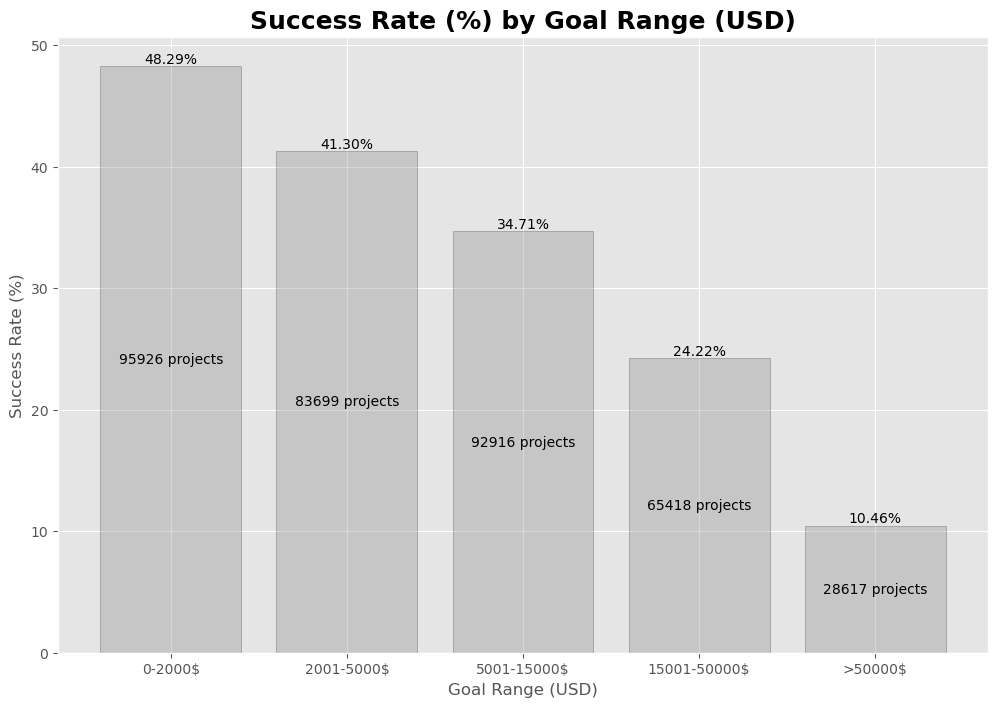

In [29]:
# Adjust the thresholds to be mutually exclusive ranges
exclusive_thresholds_usd = [(0, 2000), (2001, 5000), (5001, 15000), (15001, 50000), (50001, float('inf'))]
success_rates = []
project_counts = []

for lower, upper in exclusive_thresholds_usd:
    # Filter the DataFrame for projects with 'usd_goal_real' within the threshold range
    df_filtered = df[(df['usd_goal_real'] >= lower) & (df['usd_goal_real'] <= upper)]
    
    # Calculate the success rate for the filtered projects
    success_count = df_filtered[df_filtered['state'] == 'successful'].shape[0]
    total_count = df_filtered.shape[0]
    
    # Avoid division by zero
    if total_count > 0:
        success_rate = (success_count / total_count) * 100
    else:
        success_rate = 0

    success_rates.append(success_rate)
    project_counts.append(total_count)

# Create the bar chart for success rates
plt.figure(figsize=(12, 8))
# Modify the label for the last bar
bar_labels = [f"{lower}-{upper}$" if upper != float('inf') else '>50000$' for lower, upper in exclusive_thresholds_usd]

# Specification of bars
bars = plt.bar(bar_labels, success_rates, color='grey', edgecolor='black', alpha=0.3)

# Add labels and title
plt.xlabel("Goal Range (USD)")
plt.ylabel("Success Rate (%)")
plt.title("Success Rate (%) by Goal Range (USD)", fontsize=18, fontweight='bold')

# Annotate the bars with the actual success rates and the number of projects
for i, (rate, count, bar) in enumerate(zip(success_rates, project_counts, bars)):
    plt.text(i, rate, f"{rate:.2f}%", ha='center', va='bottom', color='black')
    plt.text(i, bar.get_height()/2, f"{count} projects", ha='center', va='center', color='black')

plt.show()

Conclusion:

- We can see that Projects with higher Goal (USD) have lower Success Rate (%)

### 3.8 Success Rate (%) by Sub-Categories and Goal Ranges (USD)

We'll take a deeper look at top 5 Sub-Categories with highest Success Rate (%).

We exclude ('chiptune', 'residences', 'letterpress') because they have < 100 projects.

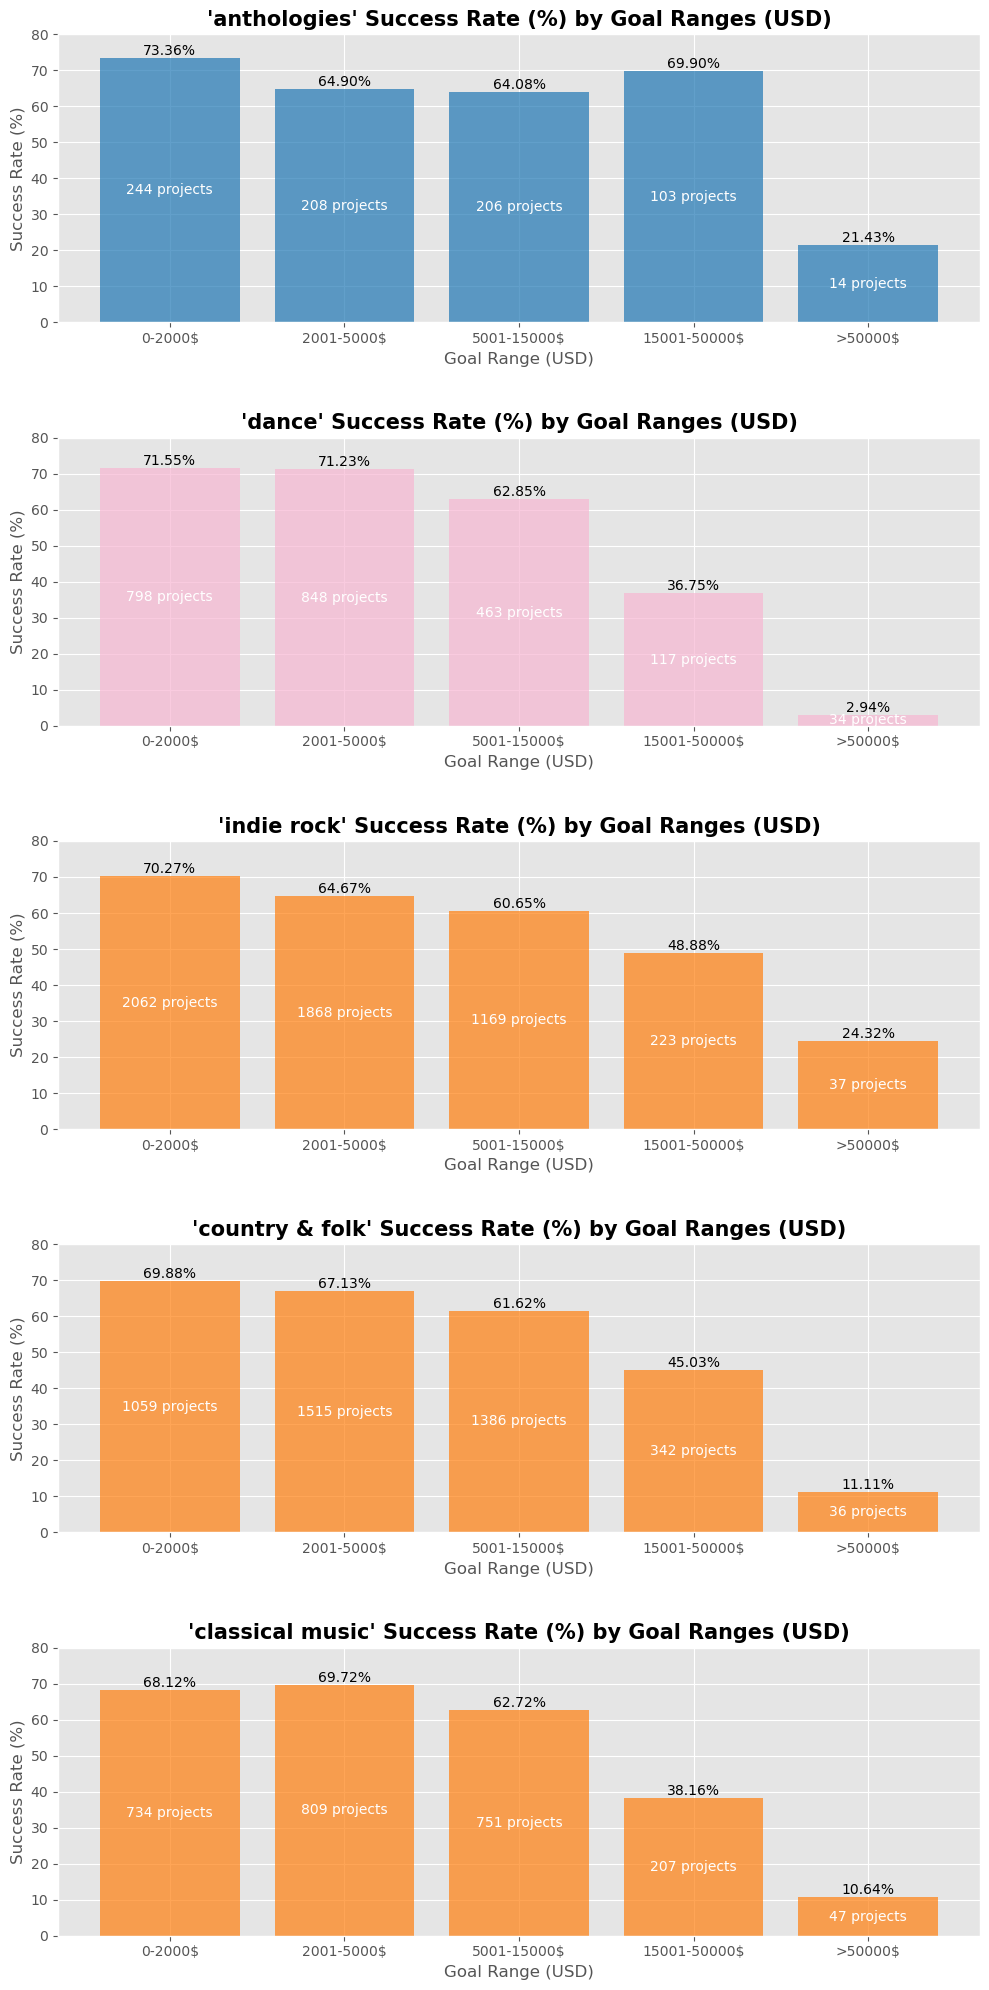

In [30]:
# Create a copy of the original DataFrame to avoid modifying it
df_new = df.copy()

# Create a color mapping from each 'category' to its corresponding 'main_category' color
category_to_main = df_new[['category', 'main_category']].drop_duplicates().set_index('category').to_dict()['main_category']
color_dict_category = {category: color_dict_main[main] for category, main in category_to_main.items()}

# Define USD goal ranges for categorization
exclusive_thresholds_usd = [(0, 2000), (2001, 5000), (5001, 15000), (15001, 50000), (50001, float('inf'))]

# Count the number of projects for each category and filter categories with more than 100 projects
category_counts = df_new['category'].value_counts()
categories_over_100 = category_counts[category_counts > 100].index.tolist()
df_filtered = df_new[df_new['category'].isin(categories_over_100)]

# Calculate the success rate for each category and sort them
category_percentage = (df_filtered[df_filtered['state'] == 'successful']['category'].value_counts() / df_filtered['category'].value_counts()) * 100
sorted_categories = category_percentage.sort_values(ascending=False)

# Select the top 5 categories by success rate
top_5_categories = sorted_categories.nlargest(5).index.tolist()

# Create subplots for each of the top 5 categories
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

# Loop through each of the top 5 categories and plot the success rates for different USD goal ranges
for i, category in enumerate(top_5_categories):
    ax = axes[i]
    success_rates = []
    project_counts = []
    
    # Loop through the defined USD goal ranges and calculate success rates
    for lower, upper in exclusive_thresholds_usd:
        df_filtered_category = df_filtered[(df_filtered['usd_goal_real'] >= lower) & (df_filtered['usd_goal_real'] <= upper) & (df_filtered['category'] == category)]
        success_count = df_filtered_category[df_filtered_category['state'] == 'successful'].shape[0]
        total_count = df_filtered_category.shape[0]
        
        # Calculate the success rate for each USD goal range
        if total_count > 0:
            success_rate = (success_count / total_count) * 100
        else:
            success_rate = 0
            
        success_rates.append(success_rate)
        project_counts.append(total_count)
        
    # Plot the bar chart for each category with the calculated success rates
    category_color = color_dict_category[category]
    bar_labels = [f"{lower}-{upper}$" if upper != float('inf') else '>50000$' for lower, upper in exclusive_thresholds_usd]
    bars = ax.bar(bar_labels, success_rates, color=category_color, alpha=0.7)
    
    # Set axis labels and titles
    ax.set_xlabel("Goal Range (USD)")
    ax.set_ylabel("Success Rate (%)")
    ax.set_title(f"'{category}' Success Rate (%) by Goal Ranges (USD)", fontsize=15, fontweight='bold')
    ax.set_ylim(0, 80)  # Y-axis limits from 0% to 20%
    
    # Annotate the bars with success rates and project counts
    for j, (rate, count, bar) in enumerate(zip(success_rates, project_counts, bars)):
        ax.text(j, rate, f"{rate:.2f}%", ha='center', va='bottom')
        ax.text(j, bar.get_height()/2, f"{count} projects", ha='center', va='center', color='white')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Show the plot
plt.show()

Observations:

- ('dance', 'indie rock', 'country & folk', 'classical music') do very well in 0 - 15000 range and we only see significant dropdown in 15001 - 50000
- 'anthologies' is also doing suprisingly well in 15001 - 50000 range

Conclusion:

- Overall trend (concluded in chart 3.7) is: Projects with higher Goal (USD) have lower % Success
- This overall trend doesn't apply for Top 5 Sub-Categories as they do well in higher Goal (USD) ranges as well

# 4. Time Series Analysis

### 4.1 Success Rate (%) by Month

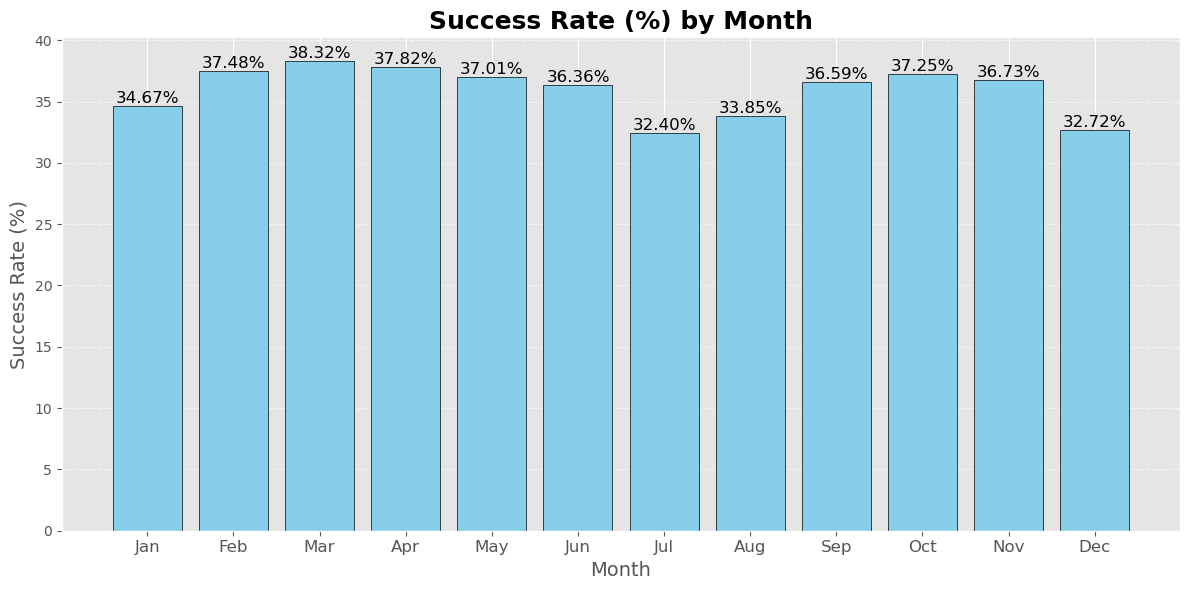

In [31]:
# Calculate the success rate for each month
month_success_rate = (df[df['state'] == 'successful'].groupby('launch_month').size() / df.groupby('launch_month').size()) * 100

# Reorder the months to follow the calendar order
month_success_rate = month_success_rate.reindex([calendar.month_abbr[i] for i in range(1, 13)])

# Create a new figure with specified dimensions
plt.figure(figsize=(12, 6))

# Create a bar chart
bars = plt.bar(month_success_rate.index, month_success_rate.values, color='skyblue', edgecolor='black')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add a title to the chart
plt.title('Success Rate (%) by Month', fontsize=18, fontweight='bold')

# Label the x-axis and y-axis
plt.xlabel('Month', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)

# Add data labels to each bar in the chart
for x, y in enumerate(month_success_rate):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=12)

# Set the rotation of the x-tick labels and specify their font size
plt.xticks(rotation=0, fontsize=12)

# Adjust the layout to prevent clipping and overlaps
plt.tight_layout()

# Display the chart
plt.show()

Conclusion:

- The Success Rate (%) is similar among Months. The differences are small
- 'July' and 'December' have the lowest Success Rate (%). December is most likely lower because it's a Holiday Peroid.

It would be interesting to investigate further why 'July' has low Success Rate (%). However, the difference is small, so it's not priority.

### 4.2 Success Rate (%) by Project Duration (Days)

Let's take a look at the chart below. Do you notice any patterns?

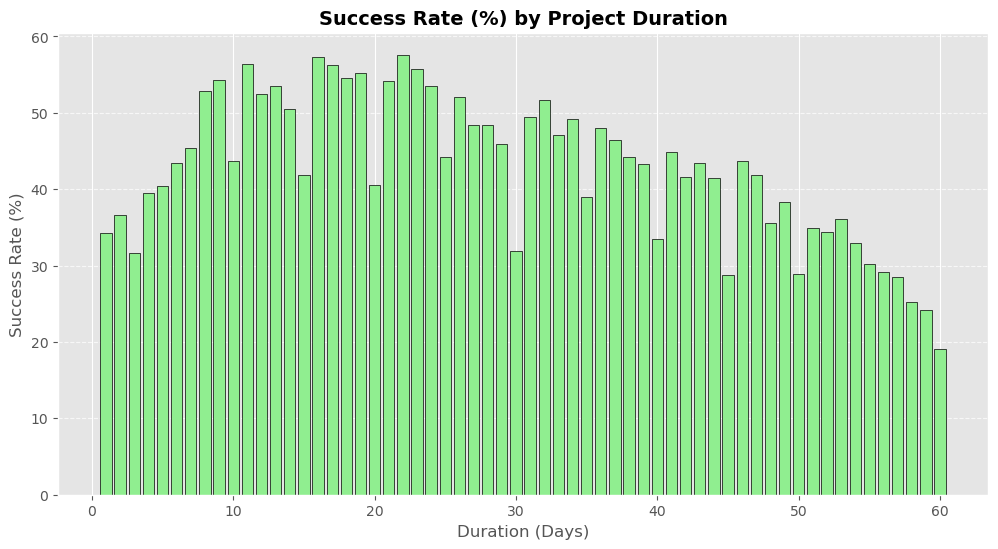

In [32]:
# Calculate the success rate for each project duration
duration_success_rate = df[df['state'] == 'successful'].groupby('duration').size() / df.groupby('duration').size()
duration_success_rate = duration_success_rate.fillna(0)  # Fill NaN values with 0 for durations with no successful projects

# Create a bar chart
plt.figure(figsize=(12, 6))

# Set the edge color for all bars
edge_color = 'black'

# Color all bars green by default
bars = plt.bar(list(duration_success_rate.index), duration_success_rate * 100, color='lightgreen', edgecolor=edge_color)

plt.title('Success Rate (%) by Project Duration', fontsize = 14, fontweight = 'bold')
plt.xlabel('Duration (Days)')
plt.ylabel('Success Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels horizontally
plt.xticks(rotation=0, ha='center')

plt.show()


### 4.3 Diving deeper into Project Duration

Let's highlight some patterns.

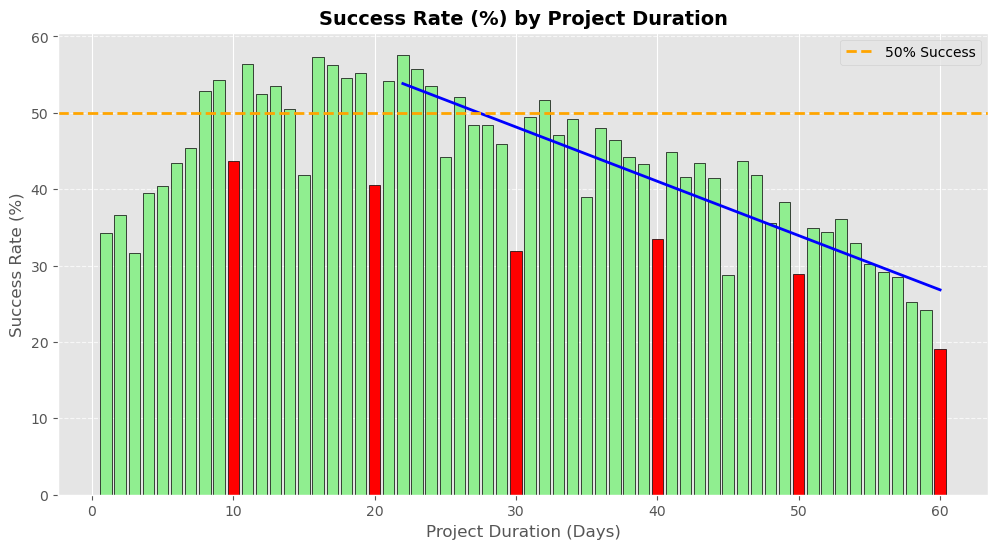

In [33]:
from scipy.stats import linregress

# Calculate the success rate for each project duration
duration_success_rate = df[df['state'] == 'successful'].groupby('duration').size() / df.groupby('duration').size()
duration_success_rate = duration_success_rate.fillna(0)  # Fill NaN values with 0 for durations with no successful projects

# Create a bar chart
plt.figure(figsize=(12, 6))

# Set the edge color for all bars
edge_color = 'black'

# Color all bars green by default
bars = plt.bar(list(duration_success_rate.index), duration_success_rate * 100, color='lightgreen', edgecolor=edge_color)

# Define specific durations to color
durations_to_color = [10, 20, 30, 40, 50, 60]

# Color specific durations in red
for duration in durations_to_color:
    index_to_color = list(duration_success_rate.index).index(duration)
    bars[index_to_color].set_color('red')
    bars[index_to_color].set_edgecolor(edge_color)  # Set the edge color for red bars

# Fit a linear regression line to the data
x = list(duration_success_rate.index)
y = duration_success_rate * 100

# Find the index where duration is 22 and start the regression line from there
start_index = x.index(22)
x_fit = x[start_index:]
y_fit = y[start_index:]
slope, intercept, _, _, _ = linregress(x_fit, y_fit)
regression_line = [slope * xi + intercept for xi in x_fit]

# Plot the straight trendline in blue
plt.plot(x_fit, regression_line, color='blue', linestyle='-', linewidth=2)

# Highlight the x-axis line at the 50% mark
plt.axhline(y=50, color='orange', linestyle='--', label='50% Success', linewidth=2)

plt.title('Success Rate (%) by Project Duration', fontsize = 14, fontweight = 'bold')
plt.xlabel('Project Duration (Days)')
plt.ylabel('Success Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels horizontally
plt.xticks(rotation=0, ha='center')

# Add a legend
plt.legend()

plt.show()

Conclusions:

- There's a significant drop in Success Rate (%) for durations with round amount of days (look at red bars)
- The Success Rates (%) drop down gradually the longer project duration (look at blue trendline)
- Short projects durations e.g. 16 - 24 days have highest Success Rate (%) (look at yellow line)

We should investigate further these very mysterious drops for round days (red bars).

### 4.4 Further investigating Project Duration

Now we'll see the previous chart, but for 5 different Goal (USD) Ranges.

Let's see if the patterns we've identified earlier hold true after we dig deeper.

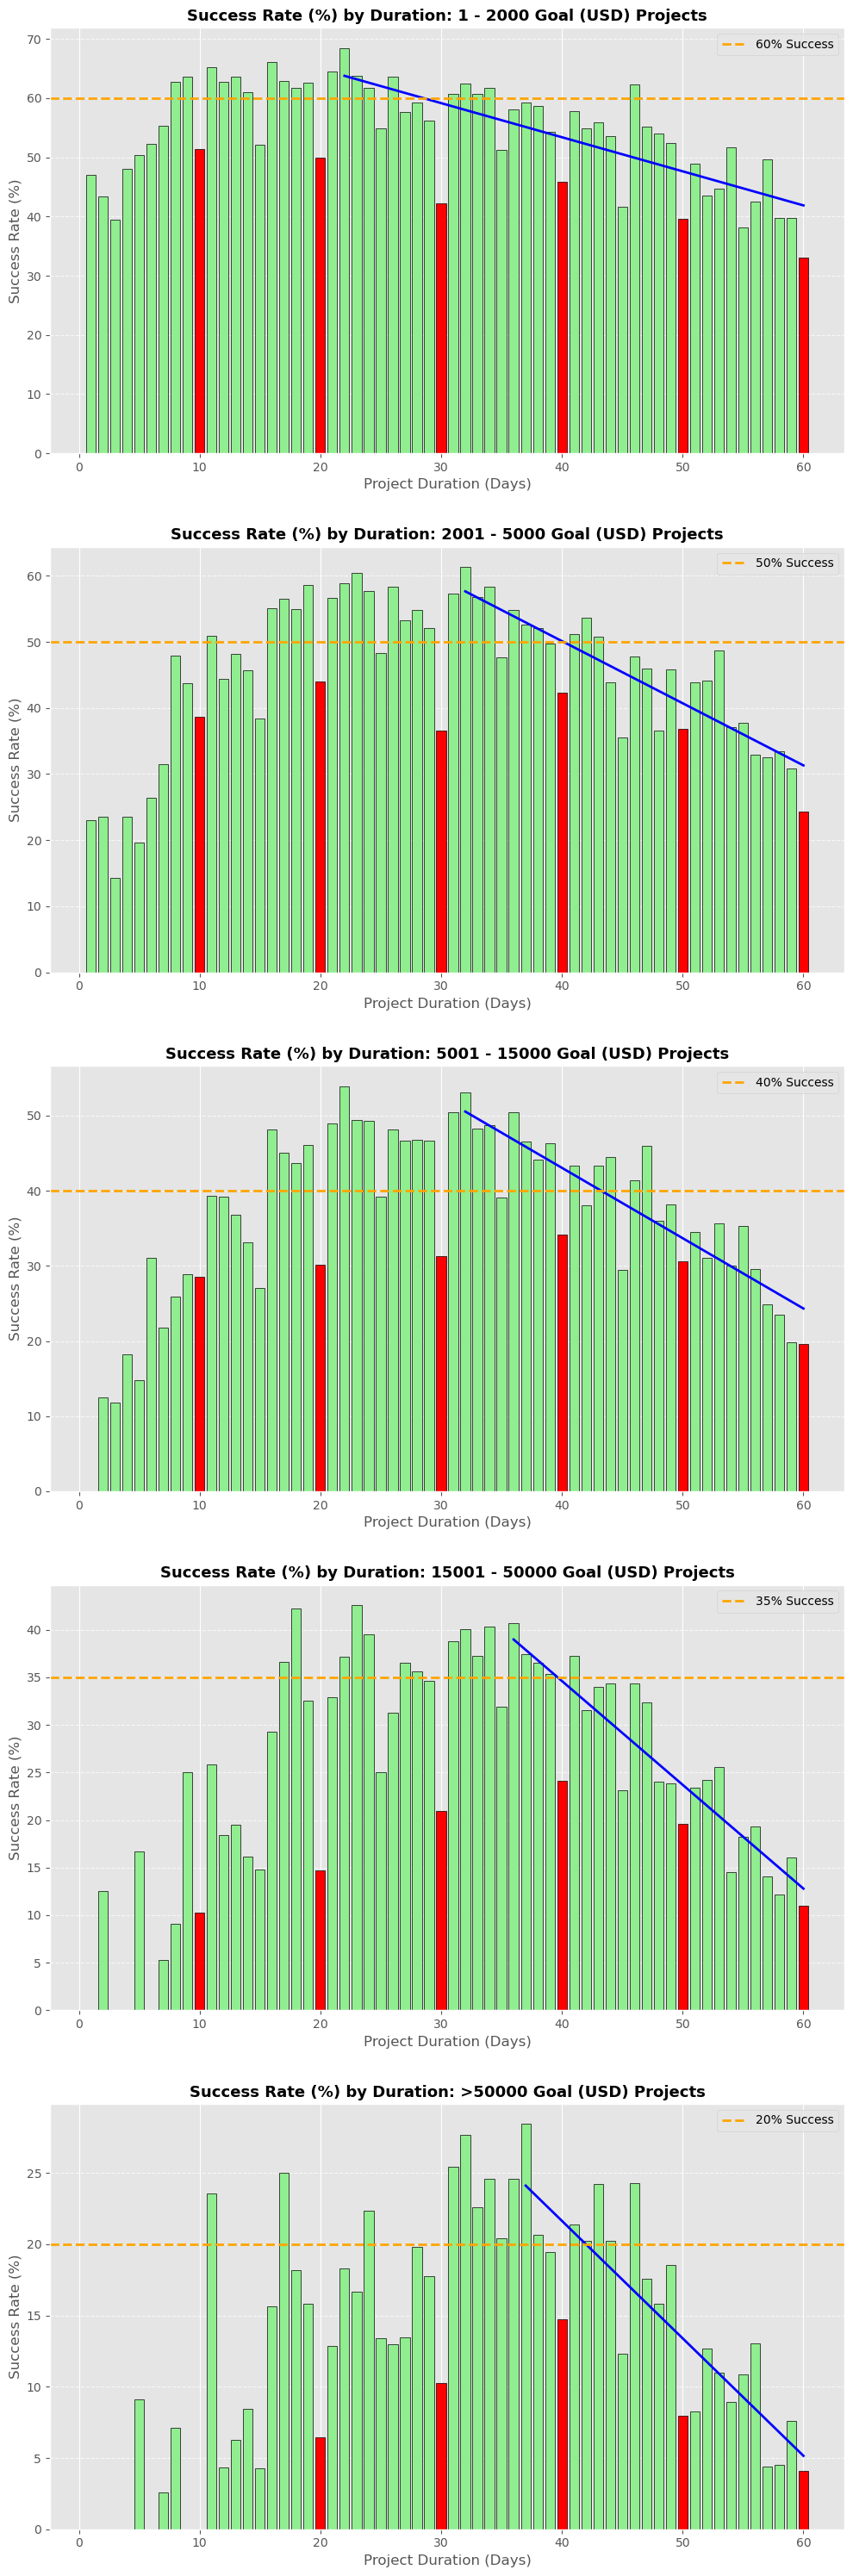

In [34]:
# Create subplots to plot each success rate chart for different USD goal ranges
fig, axes = plt.subplots(5, 1, figsize=(10, 30))

# Define the USD goal ranges and corresponding configurations for trendlines and y-axis highlights
usd_goal_ranges = [(1, 2000), (2001, 5000), (5001, 15000), (15001, 50000), (50000, float('inf'))]
trendline_starts = [22, 32, 32, 36, 37]
y_axis_highlights = [60, 50, 40, 35, 20]

# Loop through each subplot to populate it
for i, ax in enumerate(axes):
    lower, upper = usd_goal_ranges[i]
    trend_start = trendline_starts[i]
    y_highlight = y_axis_highlights[i]
    
    # Filter the DataFrame based on the 'usd_goal_real' range
    df_filtered = df[(df['usd_goal_real'] >= lower) & (df['usd_goal_real'] <= upper)]
    
    # Calculate the success rate for each project duration in the filtered DataFrame
    duration_success_rate = df_filtered[df_filtered['state'] == 'successful'].groupby('duration').size() / df_filtered.groupby('duration').size()
    duration_success_rate = duration_success_rate.fillna(0)  # Fill NaN values with 0 for durations with no successful projects
    
    # Create the bar chart
    bars = ax.bar(list(duration_success_rate.index), duration_success_rate * 100, color='lightgreen', edgecolor='black')
    
    # Color specific bars (10, 20, 30, 40, 50, 60) in red
    for duration in [10, 20, 30, 40, 50, 60]:
        if duration in duration_success_rate.index:
            index_to_color = list(duration_success_rate.index).index(duration)
            bars[index_to_color].set_color('red')
            bars[index_to_color].set_edgecolor('black')
            
    # Add trendline
    x = list(duration_success_rate.index)
    y = duration_success_rate * 100
    if trend_start in x:
        start_index = x.index(trend_start)
        x_fit = x[start_index:]
        y_fit = y[start_index:]
        slope, intercept, _, _, _ = linregress(x_fit, y_fit)
        regression_line = [slope * xi + intercept for xi in x_fit]
        ax.plot(x_fit, regression_line, color='blue', linestyle='-', linewidth=2)
    
    # Highlight y-axis line
    ax.axhline(y=y_highlight, color='orange', linestyle='--', linewidth=2, label=f"{y_highlight}% Success")
    
    # Set title and labels
    if upper == float('inf'):
        ax.set_title(f"Success Rate (%) by Duration: >{lower} Goal (USD) Projects", fontsize = 13, fontweight = 'bold')
    else:
        ax.set_title(f"Success Rate (%) by Duration: {lower} - {upper} Goal (USD) Projects", fontsize = 13, fontweight = 'bold')
    ax.set_xlabel('Project Duration (Days)')
    ax.set_ylabel('Success Rate (%)')
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Add grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.22, wspace=0.3)
plt.show()

Conclusions:

- We still have a drop in Success Rate (%) for projects with longer duration. However, for projects with high Goal (USD) this downwards trend starts later (e.g. in Goal (USD) range 15000 - 50000 the Success Rate (%) starts gradually dropping from 36th bar. So for Projects with high Goal (USD) - Longer duration is recommended.

- Significant Success (%) drop for red bars is still present.

We should dig even deeper into red bars, as these drops are big...

### 4.5 Number of Projects by Duration

Before we talk about these red bars drops... Take a look at the chart below.

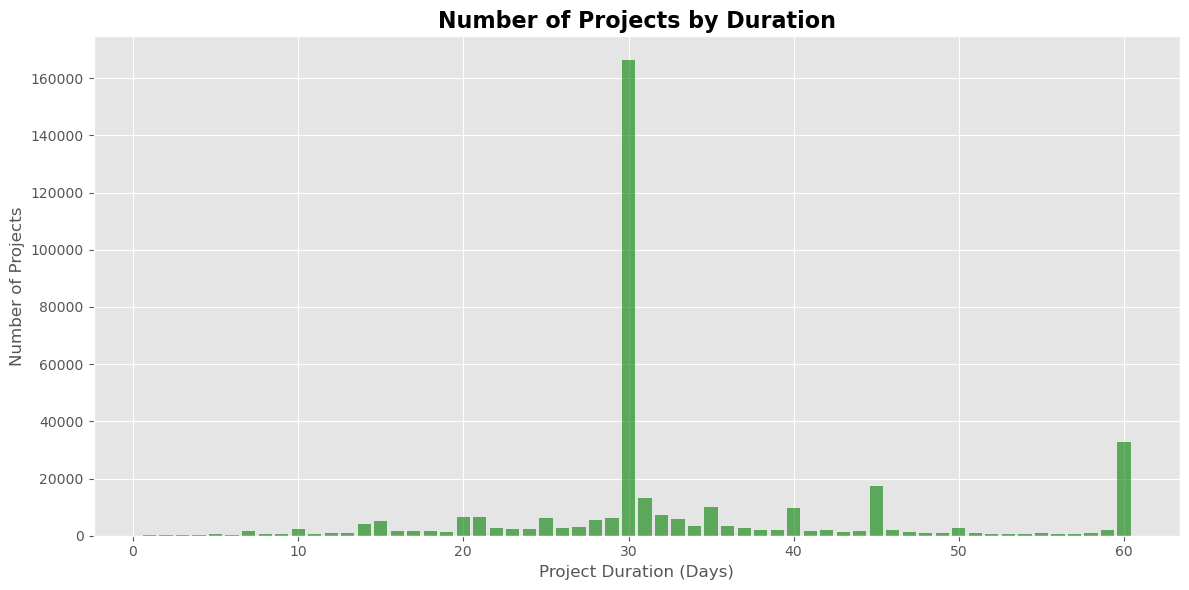

In [35]:
# Count the number of projects launched for each duration
project_count = df['duration'].value_counts().sort_index()

# Create a plot 
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the number of projects as bars
ax1.bar(project_count.index, project_count, alpha=0.6, color='green', label='Number of Projects')
ax1.set_xlabel('Project Duration (Days)')
ax1.set_ylabel('Number of Projects')

# Add title
plt.title('Number of Projects by Duration', fontsize = 16, fontweight = 'bold')

# Tight layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

Conclusions:

- Vast majority of projects have 30 days duration
- Many projects have campaign duration with round amount of days (10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60)

### 4.6 The Cause of Success Rate (%) drops

Now we take the previous chart and add Success (%) labels... Let's see what that tells us

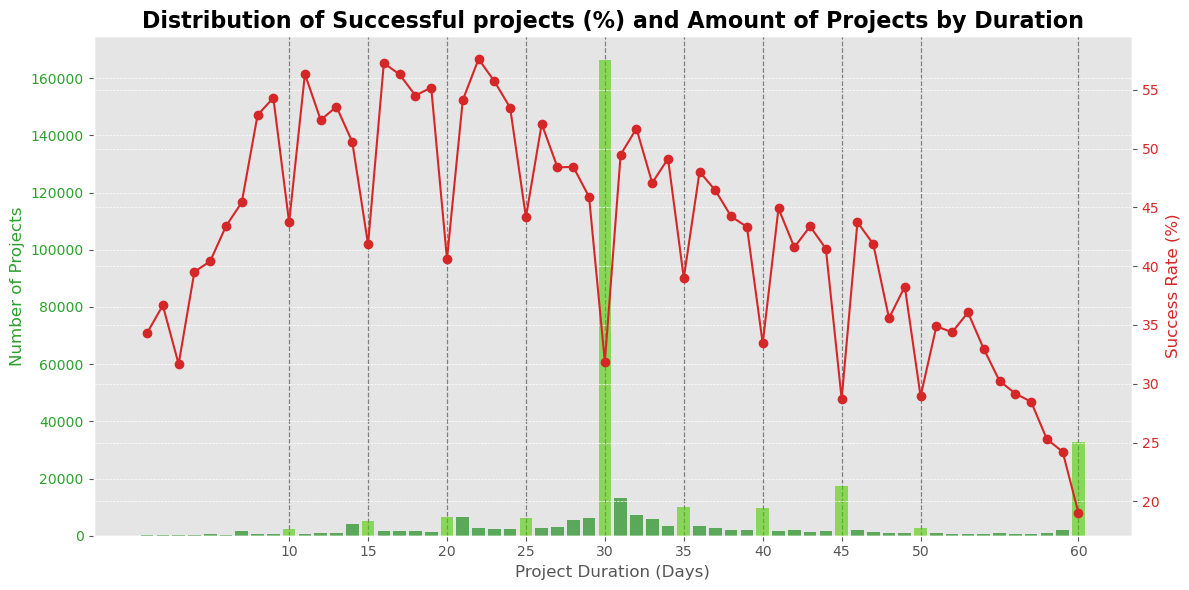

In [36]:
success_rate = (df[df['state'] == 'successful'].groupby('duration').size() / df.groupby('duration').size()) * 100
success_rate = success_rate.fillna(0)

# Count the number of projects launched for each duration
project_count = df['duration'].value_counts().sort_index()

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Highlight specific durations
highlight_durations = [10, 15, 20, 25, 30, 35, 40, 45, 50, 60]

# Plot the number of projects as bars
bars = ax1.bar(project_count.index, project_count, alpha=0.6, color='green', label='Number of Projects')

# Color the highlighted bars differently
for bar, x in zip(bars, project_count.index):
    if x in highlight_durations:
        bar.set_facecolor((0.3, 0.8, 0, 0)) 

# Create specific gridlines for highlighted durations

ax1.set_xticks(highlight_durations)
ax1.grid(which='both', axis='x', linestyle='--', linewidth=0.9, color='grey')
ax1.grid(which='both', axis='y', linestyle='--', linewidth=0.5, color='white')

# Set labels and title
ax1.set_xlabel('Project Duration (Days)')
ax1.set_ylabel('Number of Projects', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Create a second y-axis to plot the success rate
ax2 = ax1.twinx()
ax2.plot(success_rate.index, success_rate, color='tab:red', marker='o', label='Success Rate (%)')
ax2.set_ylabel('Success Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.grid(which='both', axis='y', linestyle='--', linewidth=0.5, color='white')

# Add title and legends
plt.title('Distribution of Successful projects (%) and Amount of Projects by Duration', fontsize = 16, fontweight = 'bold')
fig.tight_layout()

# Show the plot
plt.show()

Observation:
- Many projects have campaign duration (10, 15, 20...)
- Projects with these durations have significant drop in Success Rate (%)

Conclusion:

- We can see evident pattern: Popular campaign durations are less Successful.

### 4.7 Confirming Pattern - Test

Let's compare campaign durations (29, 30, 31) across Main Categories. We'll see if duration 30 has lower Success Rate (%)

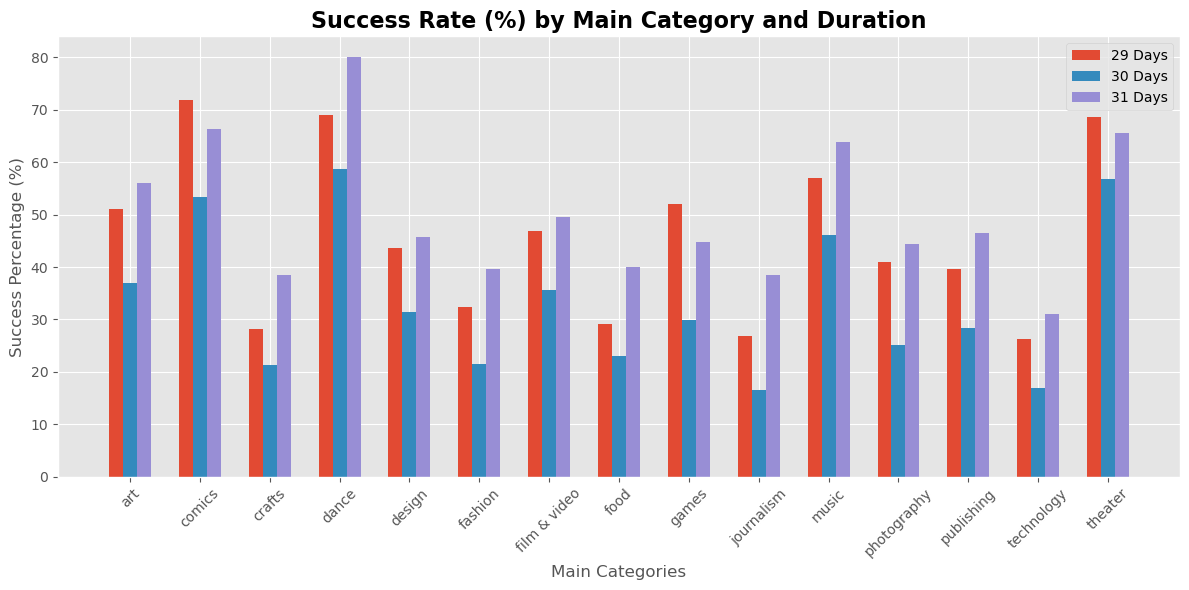

In [37]:
# Initialize a list to store the DataFrame slices for each combination of main_category and duration
dfs = []

# Iterate through the durations
for duration in [29, 30, 31]:
    # Filter the DataFrame for projects with the current duration and calculate the success rate for each main_category
    filtered_df = df[df['duration'] == duration]
    success_rate = (filtered_df[filtered_df['state'] == 'successful'].groupby('main_category').size() / filtered_df.groupby('main_category').size()) * 100
    success_rate = success_rate.reset_index(name=f'Success_Rate_{duration}')
    dfs.append(success_rate)

# Merge the DataFrames on 'main_category'
merged_df = dfs[0]
for df_next in dfs[1:]:
    merged_df = pd.merge(merged_df, df_next, on='main_category', how='outer')

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(merged_df['main_category']))

for i, duration in enumerate([29, 30, 31]):
    ax.bar(index + i * bar_width, merged_df[f'Success_Rate_{duration}'], bar_width, label=f'{duration} Days')

ax.set_xlabel('Main Categories')
ax.set_ylabel('Success Percentage (%)')
ax.set_title('Success Rate (%) by Main Category and Duration', fontsize = 16, fontweight = 'bold')
ax.set_xticks(index + (bar_width * (len([29, 30, 31]) - 1) / 2))
ax.set_xticklabels(merged_df['main_category'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

Observation:
- campaign duration '30 Days' has lower Success (%) in all Main Categories

Conclusions:
- Pattern confirmed (Popular campaign durations are less Successful)

We've only identified a pattern. We still don't know if choosing popular campaign duration actually decreases project's chance for success. Causal analysis is required if we'd like to know that.

However from practical perspective I'd recommend choosing campaign duration that's NOT popular (e.g. 29 days). It can't hurt and maybe helps.

### 4.8 Yearly Distribution of Project States

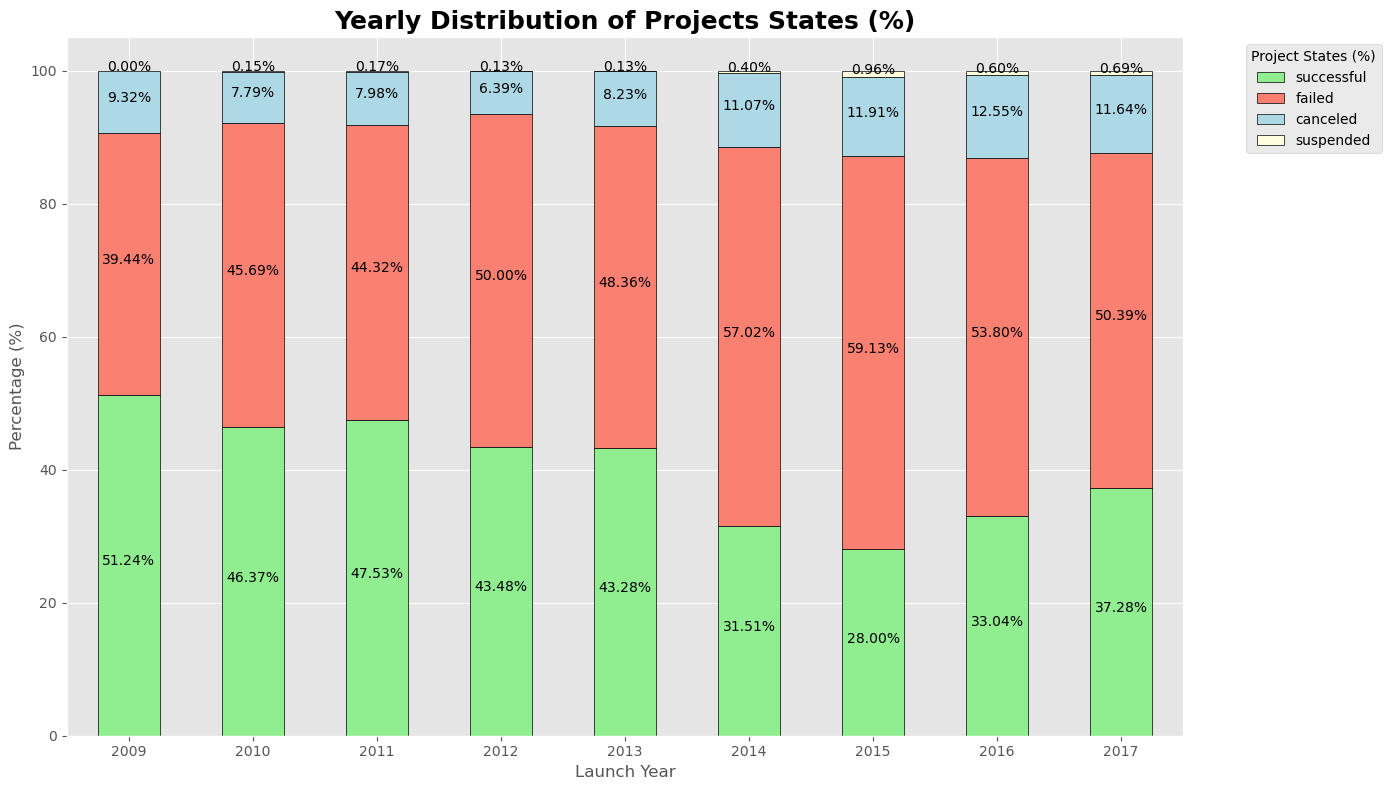

In [38]:
# Custom colors for each state
custom_colors = {
    'failed': 'salmon',
    'successful': 'lightgreen',
    'canceled': 'lightblue',
    'suspended': 'lightyellow'
}

# Group the data by 'launch_year' and 'state', then count the occurrences of each state for each year
state_year_count = df.groupby(['launch_year', 'state']).size().reset_index(name='count')

# Calculate the total number of projects for each year
total_year_count = df.groupby('launch_year').size().reset_index(name='total_count')

# Merge the two dataframes on 'launch_year'
merged_df = pd.merge(state_year_count, total_year_count, on='launch_year')

# Calculate the percentage of each state for each year
merged_df['percentage'] = (merged_df['count'] / merged_df['total_count']) * 100

# Pivot the DataFrame for easier plotting
pivot_df = merged_df.pivot(index='launch_year', columns='state', values='percentage')

# Sort the columns to the desired order
pivot_df = pivot_df[['successful', 'failed', 'canceled', 'suspended']]

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=[custom_colors.get(x, '#333333') for x in pivot_df.columns], edgecolor = 'black')
plt.title('Yearly Distribution of Projects States (%)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Launch Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Project States (%)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels to the bars
for idx, year in enumerate(pivot_df.index):
    y_offset = 0
    for state in pivot_df.columns:
        value = pivot_df.loc[year, state]
        if not pd.isna(value):
            plt.text(idx, y_offset + value / 2, f"{value:.2f}%", ha='center')
            y_offset += value

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Observations:
    
- Early years have higher Success (%). First year 2009 is the highest
- There's a big dropdown in Success (%) in year 2014
- Years 2014, 2015 have lowest Success (%)

Let's dive deeper and try to understand why all of that happened

### 4.9 Yearly Distribution of Projects Launched

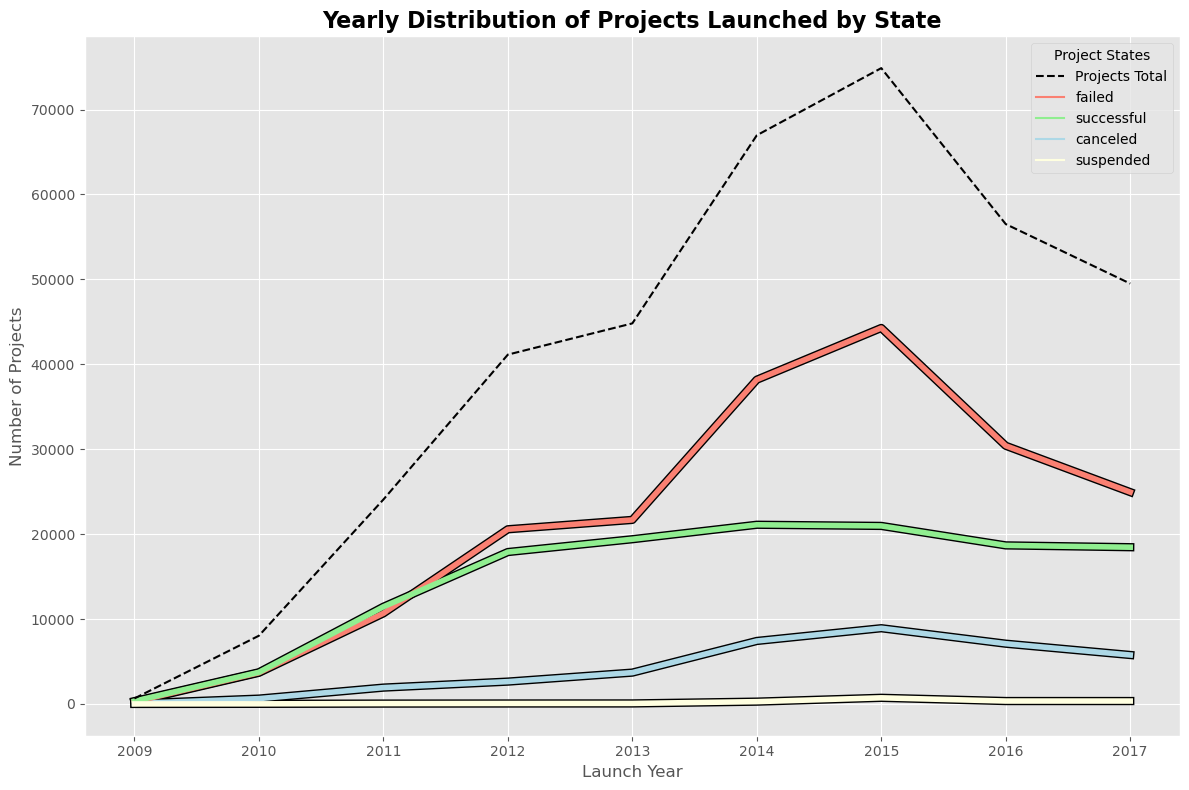

In [39]:
# Custom colors for each project state
custom_colors = {
    'failed': 'salmon',
    'successful': 'lightgreen',
    'canceled': 'lightblue',
    'suspended': 'lightyellow'
}

# Group the data by 'launch_year' and 'state', then count the occurrences of each state for each year
state_year_count = df.groupby(['launch_year', 'state']).size().reset_index(name='count')

# Calculate the total number of projects for each year
total_year_count = df.groupby('launch_year').size().reset_index(name='total_count')

# Merge the two dataframes on 'launch_year'
merged_df = pd.merge(state_year_count, total_year_count, on='launch_year')

# Create the line chart for the number of projects in each state by year
plt.figure(figsize=(12, 8))

# Add outlines for the lines for better visibility
for state in custom_colors.keys():
    sns.lineplot(x='launch_year', y='count', data=merged_df[merged_df['state'] == state], linewidth=6, color='black')

# Add the actual lines
sns.lineplot(x='launch_year', y='count', hue='state', data=merged_df, palette=custom_colors, linewidth=4)

plt.title('Yearly Distribution of Projects Launched by State', fontsize=16, fontweight='bold')
plt.xlabel('Launch Year')
plt.ylabel('Number of Projects')

# Create a line for the total number of projects launched each year
sns.lineplot(x='launch_year', y='total_count', data=total_year_count, label='Projects Total', color='k', linestyle='--')

# Sort the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 2, 0, 3]  # this can be modified based on the actual order of the labels in your plot
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Project States', bbox_to_anchor=(1, 1), loc='upper right')

plt.tight_layout()
plt.show()

Conclusions:

- The highest Success (%) for 2009 (concluded in chart 4.8) could be due to 'Novelty Effect'. Kickstarter was launched that year. There are very few projects in 2009, so it's hard to do meaningful analysis.
- The dropdown of Success (%) in 2014 (concluded in chart 4.8)... In 2014 Total amount of Projects went up. Notice that the amount of successful projects stayed the same, whereas the amount of failed projects went up.

We should investigate further why failed projects went up in 2014

### Why years 2014 - 2015 have low Success (%)

When you look at the chart below, keep in mind one thing:
- Main Categories (on the left) are sorted from Highest Success (%) to Lowest

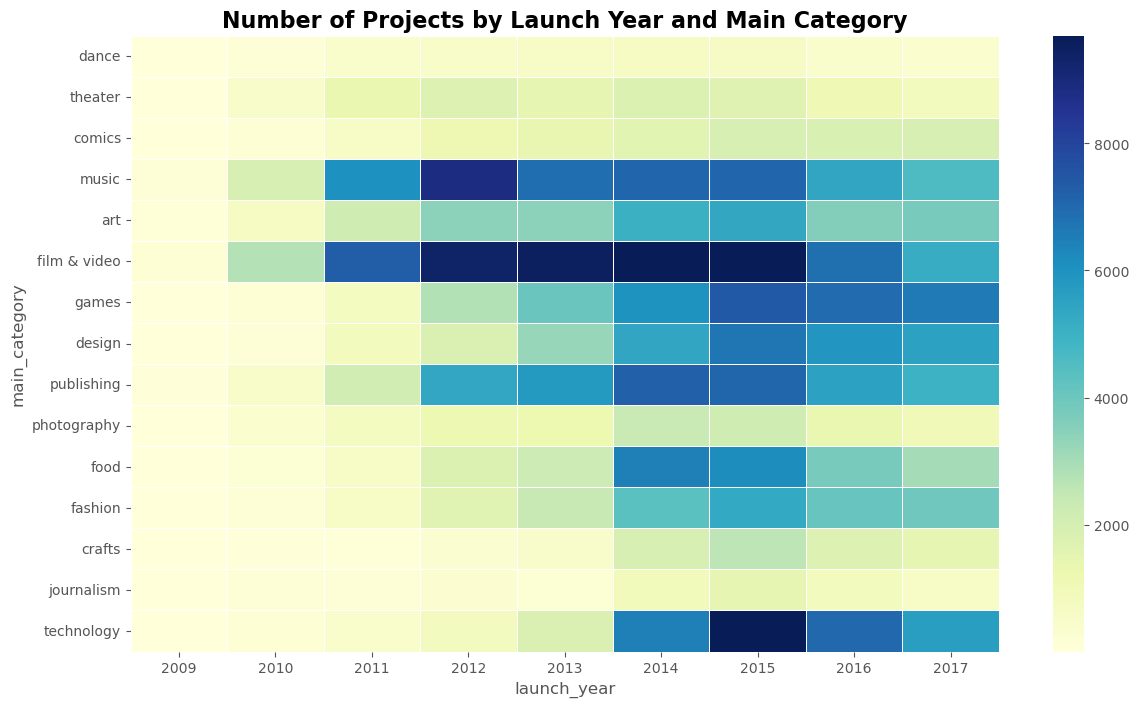

In [40]:
# Calculate the percentage of successful projects for each main category
category_success_percentage = (df[df['state'] == 'successful']['main_category']
                                .value_counts() / df['main_category'].value_counts())
category_success_percentage = category_success_percentage.fillna(0)  # Fill NaN values with 0

# Sort main categories in descending order based on success percentage
sorted_categories = category_success_percentage.sort_values(ascending=False).index

# Filter the DataFrame for the relevant columns
df_filtered = df[['launch_year', 'main_category']]

# Pivot the DataFrame to create a table of counts
heatmap_data = df_filtered.pivot_table(index='main_category', columns='launch_year', aggfunc=len, fill_value=0)

# Reorder the heatmap data based on sorted categories
heatmap_data = heatmap_data.reindex(sorted_categories)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=0.5)

# Set title
plt.title('Number of Projects by Launch Year and Main Category', fontsize = 16, fontweight = 'bold')

# Show the heatmap
plt.show()

Observations:
- In 2014 we see more Projects from ('Technology, 'Fashion', 'Food', 'Publishing')
- In 2016, 2017 we see less of these projects

Conclusion:
- These Main Categories ('Technology, 'Fashion', 'Food', 'Publishing') have low Success (%)
- The biggest negative impact was due to rise of 'Technology' as it that has the lowest Success (%)

The above conclusions explain the Success (%) drop in 2014, 2015 and why in 2016, 2017 Success (%) went up again.

# 5. Demographic Analysis

### 5.1 Number of Projects by Country

In [41]:
!pip install folium
!pip install pandas

In [42]:
# Importing necessary libraries
import folium

# Group the data by 'country' and count the number of projects
grouped_data = df.groupby('country').size().reset_index(name='total_projects')

# Convert country codes to string, and store them in a list
country_str_list = grouped_data['country'].astype(str).tolist()

# Coordinates for countries
country_coords = {
    'AT': [47.7, 13.3], 'AU': [-25.3, 134], 'BE': [50.5, 4.5], 
    'CA': [56.1, -106.3], 'CH': [46.9, 8.2], 'DE': [51.2, 10.4], 
    'DK': [56.3, 9.5], 'ES': [40.5, -3.7], 'FR': [46.6, 2.2], 
    'GB': [54.8, -2.6], 'HK': [22.4, 114.1], 'IE': [53.4, -8], 
    'IT': [42.9, 12.6], 'JP': [37.4, 137.5], 'LU': [49.8, 6.1], 
    'MX': [24, -102], 'NL': [52.3, 5.4], 'NO': [60.5, 8.9], 
    'NZ': [-41.3, 174.8], 'SE': [60.1, 18.8], 'SG': [1.4, 103.8], 
    'US': [39.8, -98.6]
}

# Create a list to hold the coordinates corresponding to the countries in grouped_data
coords_list = [country_coords.get(country_code, [0, 0]) for country_code in country_str_list]

# Initialize the map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add circle markers to the map
for idx, row in grouped_data.iterrows():
    coords = country_coords.get(row['country'], [0, 0])  # Retrieve coordinates from the dictionary
    if coords != [0, 0]:  # Check if coordinates are available
        folium.CircleMarker(
            location=coords,
            radius=(row['total_projects'] ** 0.5) / 15,  # Further increased the scaling factor
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{row['country']}: {row['total_projects']} projects"
        ).add_to(m)

# Show the map
m


Conclusion:
- Vast Majority of Projects is from USA
- We have Countries all over the globe (mostly small amounts of Projects)

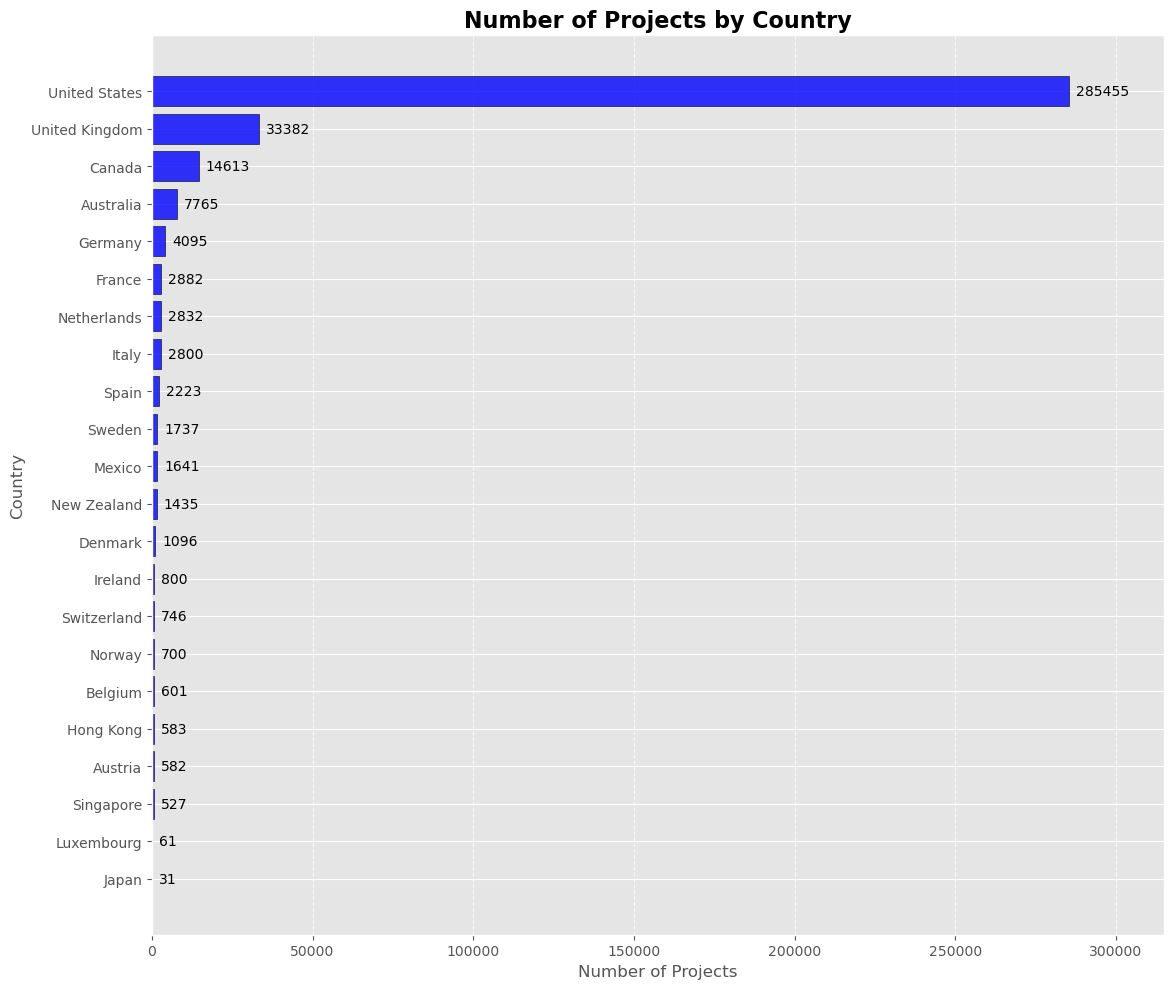

In [43]:
# Function to convert 2-letter country code to full name
def country_code_to_name(code):
    country_dict = {
        'US': 'United States', 'GB': 'United Kingdom', 'CA': 'Canada', 'AU': 'Australia', 'DE': 'Germany',
        'FR': 'France', 'IT': 'Italy', 'NL': 'Netherlands', 'ES': 'Spain', 'SE': 'Sweden',
        'MX': 'Mexico', 'NZ': 'New Zealand', 'DK': 'Denmark', 'IE': 'Ireland', 'CH': 'Switzerland',
        'NO': 'Norway', 'BE': 'Belgium', 'AT': 'Austria', 'HK': 'Hong Kong', 'SG': 'Singapore',
        'LU': 'Luxembourg', 'JP': 'Japan', 'IS': 'Iceland'
    }
    return country_dict.get(code, code)

# Calculate the total number of projects for each country
country_project_count = df.groupby('country').size()

# Sort the countries by number of projects in ascending order
sorted_country_project_count = country_project_count.sort_values(ascending=True)

# Convert 2-letter country codes to full country names in the index
sorted_country_project_count.index = [country_code_to_name(code) for code in sorted_country_project_count.index]

# Create the bar chart with full country names
plt.figure(figsize=(12, 10))
bars = plt.barh(sorted_country_project_count.index, sorted_country_project_count, color='blue', alpha = 0.8, edgecolor='black')

# Add labels to bars displaying exact counts
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width}', 
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 ha='left',
                 va='center')

plt.title('Number of Projects by Country', fontsize=16, fontweight='bold')
plt.xlabel('Number of Projects')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Make sure everything fits without overlapping
plt.xlim(0, 315000)
plt.show()

### 5.2 Success Rate (%) by Country

In [44]:
import folium

# Count the total number of projects by country
total_projects = df.groupby('country').size().reset_index(name='total_projects')

# Count the number of successful projects by country
successful_projects = df[df['state'] == 'successful'].groupby('country').size().reset_index(name='successful_projects')

# Merge the two DataFrames
merged_data = pd.merge(total_projects, successful_projects, on='country', how='left')

# Calculate the success rate, handling NaN values
merged_data['success_rate'] = (merged_data['successful_projects'].fillna(0) / merged_data['total_projects']) * 100

# Map 2-letter codes to 3-letter codes
iso_2_to_3 = {'AT': 'AUT', 'AU': 'AUS', 'BE': 'BEL', 'CA': 'CAN', 'CH': 'CHE', 'DE': 'DEU', 
              'DK': 'DNK', 'ES': 'ESP', 'FR': 'FRA', 'GB': 'GBR', 'HK': 'HKG', 'IE': 'IRL', 
              'IT': 'ITA', 'JP': 'JPN', 'LU': 'LUX', 'MX': 'MEX', 'NL': 'NLD', 'NO': 'NOR', 
              'NZ': 'NZL', 'SE': 'SWE', 'SG': 'SGP', 'US': 'USA'}
merged_data['iso3'] = merged_data['country'].map(iso_2_to_3)

# Initialize the map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add Choropleth
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='choropleth',
    data=merged_data,
    columns=['iso3', 'success_rate'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Success Rate (%)'
).add_to(m)

# Show map
m

Conclusions:
- USA and UK have very high Success (%)
- European countries have low Success (%)

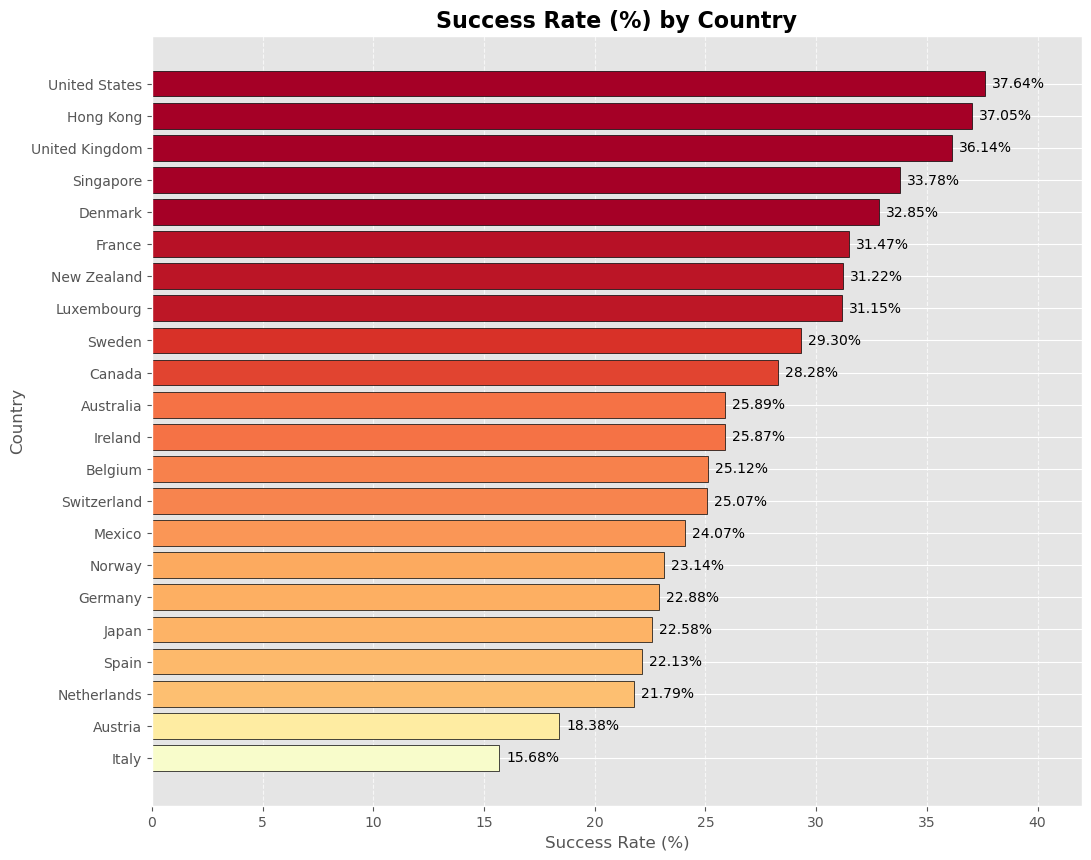

In [45]:
# Function to convert 2-letter country code to full name
def country_code_to_name(code):
    country_dict = {
        'US': 'United States', 'GB': 'United Kingdom', 'CA': 'Canada', 'AU': 'Australia', 'DE': 'Germany',
        'FR': 'France', 'IT': 'Italy', 'NL': 'Netherlands', 'ES': 'Spain', 'SE': 'Sweden',
        'MX': 'Mexico', 'NZ': 'New Zealand', 'DK': 'Denmark', 'IE': 'Ireland', 'CH': 'Switzerland',
        'NO': 'Norway', 'BE': 'Belgium', 'AT': 'Austria', 'HK': 'Hong Kong', 'SG': 'Singapore',
        'LU': 'Luxembourg', 'JP': 'Japan', 'IS': 'Iceland'
    }
    return country_dict.get(code, code)

# Calculate the success rate for each country
country_success_rate = df[df['state'] == 'successful'].groupby('country').size() / df.groupby('country').size()
country_success_rate = country_success_rate.fillna(0)

# Sort the countries by success rate in ascending order
sorted_country_success_rate = country_success_rate.sort_values(ascending=True)

# Convert 2-letter country codes to full country names in the index
sorted_country_success_rate.index = [country_code_to_name(code) for code in sorted_country_success_rate.index]

# Create a color palette that gradually changes color from darkest to lightest based on success rate
palette = plt.cm.RdYlBu_r(sorted_country_success_rate / (0.87 * sorted_country_success_rate.max()))



# Create the bar chart with full country names
plt.figure(figsize=(12, 10))
bars = plt.barh(sorted_country_success_rate.index, sorted_country_success_rate * 100, color=palette, edgecolor='black')

# Add labels to bars displaying exact percentages
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.2f}%', 
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 ha='left',
                 va='center')

plt.title('Success Rate (%) by Country', fontsize = 16, fontweight = 'bold')
plt.xlabel('Success Rate (%)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 42)

plt.show()